In [2]:
import pandas as pd

In [4]:
sales = pd.read_excel('/Users/apple/Downloads/Pizza_Sale.xlsx')
ing = pd.read_excel('/Users/apple/Downloads/Pizza_ingredients.xlsx')

In [8]:
sales

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1,1,hawaiian_m,1,2015-01-01 00:00:00,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2,2,classic_dlx_m,1,2015-01-01 00:00:00,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3,2,five_cheese_l,1,2015-01-01 00:00:00,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4,2,ital_supr_l,1,2015-01-01 00:00:00,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5,2,mexicana_m,1,2015-01-01 00:00:00,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza
...,...,...,...,...,...,...,...,...,...,...,...,...
48615,48616,21348,ckn_alfredo_m,1,31-12-2015,21:23:10,16.75,16.75,M,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A...",The Chicken Alfredo Pizza
48616,48617,21348,four_cheese_l,1,31-12-2015,21:23:10,17.95,17.95,L,Veggie,"Ricotta Cheese, Gorgonzola Piccante Cheese, Mo...",The Four Cheese Pizza
48617,48618,21348,napolitana_s,1,31-12-2015,21:23:10,12.00,12.00,S,Classic,"Tomatoes, Anchovies, Green Olives, Red Onions,...",The Napolitana Pizza
48618,48619,21349,mexicana_l,1,31-12-2015,22:09:54,20.25,20.25,L,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


In [10]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pizza_id           48620 non-null  int64  
 1   order_id           48620 non-null  int64  
 2   pizza_name_id      48604 non-null  object 
 3   quantity           48620 non-null  int64  
 4   order_date         48620 non-null  object 
 5   order_time         48620 non-null  object 
 6   unit_price         48620 non-null  float64
 7   total_price        48613 non-null  float64
 8   pizza_size         48620 non-null  object 
 9   pizza_category     48597 non-null  object 
 10  pizza_ingredients  48607 non-null  object 
 11  pizza_name         48613 non-null  object 
dtypes: float64(2), int64(3), object(7)
memory usage: 4.5+ MB


In [12]:
sales.isnull().sum()

pizza_id              0
order_id              0
pizza_name_id        16
quantity              0
order_date            0
order_time            0
unit_price            0
total_price           7
pizza_size            0
pizza_category       23
pizza_ingredients    13
pizza_name            7
dtype: int64

In [14]:
sales['total_price'].fillna(sales['quantity'] * sales['unit_price'], inplace=True)


/var/folders/bh/m62jl6f93k555v8_jbrgqy3c0000gn/T/ipykernel_2713/2379340839.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sales['total_price'].fillna(sales['quantity'] * sales['unit_price'], inplace=True)


In [16]:
# Create a dictionary mapping pizza_name_id to ingredients
ingredients_map = sales[['pizza_name_id', 'pizza_ingredients']].dropna().drop_duplicates().set_index('pizza_name_id')['pizza_ingredients']

# Fill pizza_ingredients based on pizza_name_id
sales['pizza_ingredients'] = sales['pizza_ingredients'].fillna(sales['pizza_name_id'].map(ingredients_map))


In [18]:
pizza_id_map = sales[['pizza_ingredients', 'pizza_name_id']].dropna().drop_duplicates(subset=['pizza_ingredients'], keep='first').set_index('pizza_ingredients')['pizza_name_id']



In [20]:
# Fill pizza_name_id based on pizza_ingredients
sales['pizza_name_id'] = sales['pizza_name_id'].fillna(sales['pizza_ingredients'].map(pizza_id_map))


In [22]:
# Create a dictionary mapping pizza_name_id to pizza_category
category_map = sales[['pizza_name_id', 'pizza_category']].dropna().drop_duplicates().set_index('pizza_name_id')['pizza_category']

# Fill pizza_category based on pizza_name_id
sales['pizza_category'] = sales['pizza_category'].fillna(sales['pizza_name_id'].map(category_map))


In [24]:
# Create a dictionary mapping pizza_name_id to pizza_name
pizza_name_map = sales[['pizza_name_id', 'pizza_name']].dropna().drop_duplicates().set_index('pizza_name_id')['pizza_name']


In [26]:
# Fill pizza_name based on pizza_name_id
sales['pizza_name'] = sales['pizza_name'].fillna(sales['pizza_name_id'].map(pizza_name_map))


In [28]:
sales.isnull().sum()

pizza_id             0
order_id             0
pizza_name_id        0
quantity             0
order_date           0
order_time           0
unit_price           0
total_price          0
pizza_size           0
pizza_category       0
pizza_ingredients    0
pizza_name           0
dtype: int64

In [30]:

print(sales.info())


print(sales.describe())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pizza_id           48620 non-null  int64  
 1   order_id           48620 non-null  int64  
 2   pizza_name_id      48620 non-null  object 
 3   quantity           48620 non-null  int64  
 4   order_date         48620 non-null  object 
 5   order_time         48620 non-null  object 
 6   unit_price         48620 non-null  float64
 7   total_price        48620 non-null  float64
 8   pizza_size         48620 non-null  object 
 9   pizza_category     48620 non-null  object 
 10  pizza_ingredients  48620 non-null  object 
 11  pizza_name         48620 non-null  object 
dtypes: float64(2), int64(3), object(7)
memory usage: 4.5+ MB
None
           pizza_id      order_id      quantity    unit_price   total_price
count  48620.000000  48620.000000  48620.000000  48620.000000  48620.000000


In [32]:
import pandas as pd

# Convert order_date and order_time to datetime
sales['order_date'] = pd.to_datetime(sales['order_date'])
sales['order_time'] = pd.to_datetime(sales['order_time'], format='%H:%M:%S').dt.time


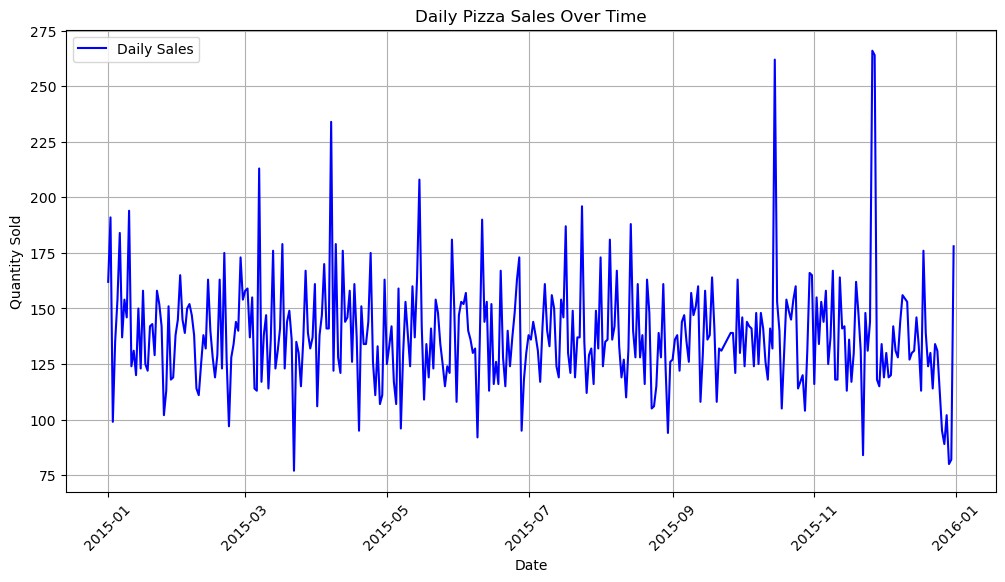

In [34]:
import matplotlib.pyplot as plt

# Group by order_date to get daily sales
daily_sales = sales.groupby('order_date')['quantity'].sum()

#daily sales trends
plt.figure(figsize=(12, 6))
plt.plot(daily_sales, label='Daily Sales', color='blue')
plt.title('Daily Pizza Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Quantity Sold')
plt.legend()
plt.xticks(rotation=45)
plt.grid()
plt.show()


/var/folders/bh/m62jl6f93k555v8_jbrgqy3c0000gn/T/ipykernel_2713/2390977264.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = daily_sales.resample('M').sum()


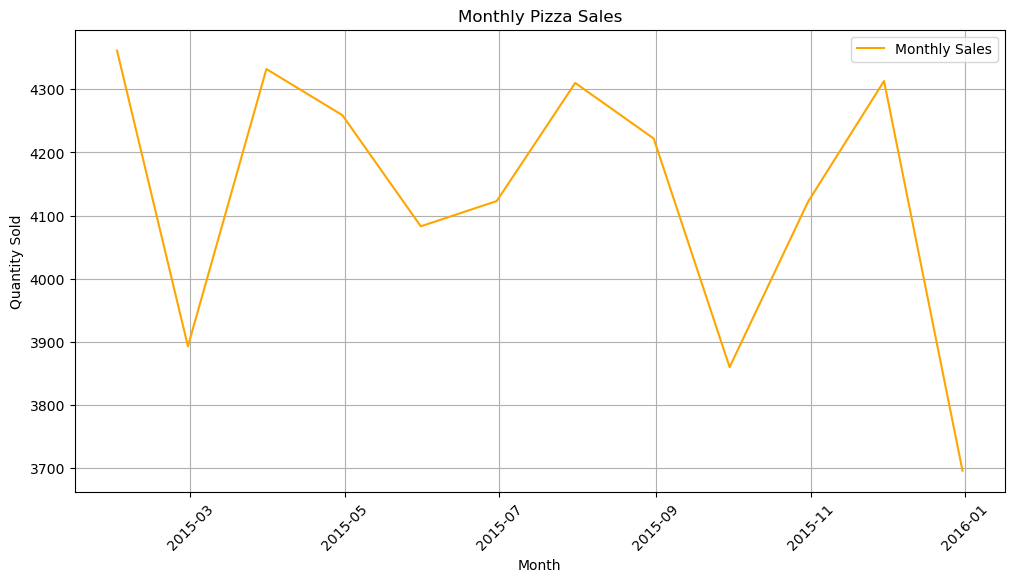

In [36]:
# Aggregate by month to view monthly trends
monthly_sales = daily_sales.resample('M').sum()

plt.figure(figsize=(12, 6))
plt.plot(monthly_sales, color='orange', label='Monthly Sales')
plt.title('Monthly Pizza Sales')
plt.xlabel('Month')
plt.ylabel('Quantity Sold')
plt.legend()
plt.xticks(rotation=45)
plt.grid()
plt.show()


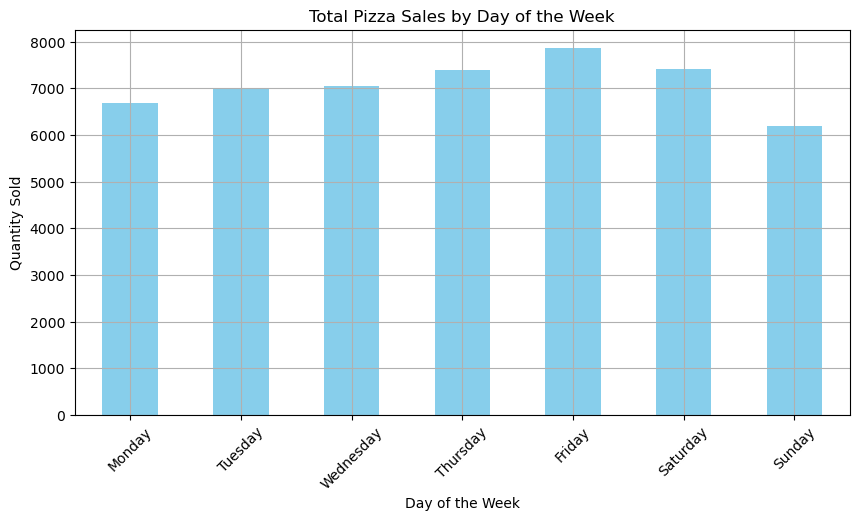

In [38]:
# Add 'day_of_week' to the sales data
sales['day_of_week'] = sales['order_date'].dt.day_name()

# Group by day of the week
day_of_week_sales = sales.groupby('day_of_week')['quantity'].sum().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)

#sales by day of the week
plt.figure(figsize=(10, 5))
day_of_week_sales.plot(kind='bar', color='skyblue')
plt.title('Total Pizza Sales by Day of the Week')
plt.ylabel('Quantity Sold')
plt.xlabel('Day of the Week')
plt.xticks(rotation=45)
plt.grid()
plt.show()


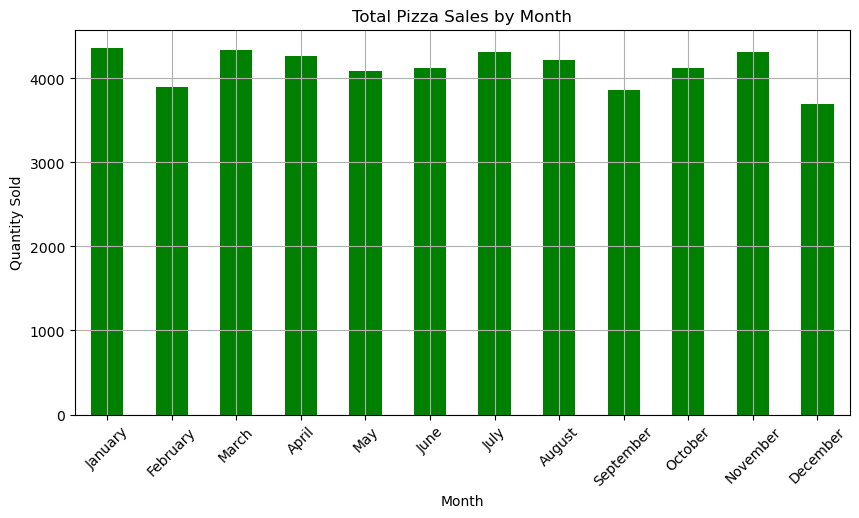

In [40]:
# Add 'month' to the sales data
sales['month'] = sales['order_date'].dt.month_name()

# Group by month
monthly_sales = sales.groupby('month')['quantity'].sum().reindex(
    ['January', 'February', 'March', 'April', 'May', 'June', 
     'July', 'August', 'September', 'October', 'November', 'December']
)

#sales by month
plt.figure(figsize=(10, 5))
monthly_sales.plot(kind='bar', color='green')
plt.title('Total Pizza Sales by Month')
plt.ylabel('Quantity Sold')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.grid()
plt.show()


/var/folders/bh/m62jl6f93k555v8_jbrgqy3c0000gn/T/ipykernel_2713/1560380931.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  sales['hour'] = pd.to_datetime(sales['order_time'].astype(str)).dt.hour


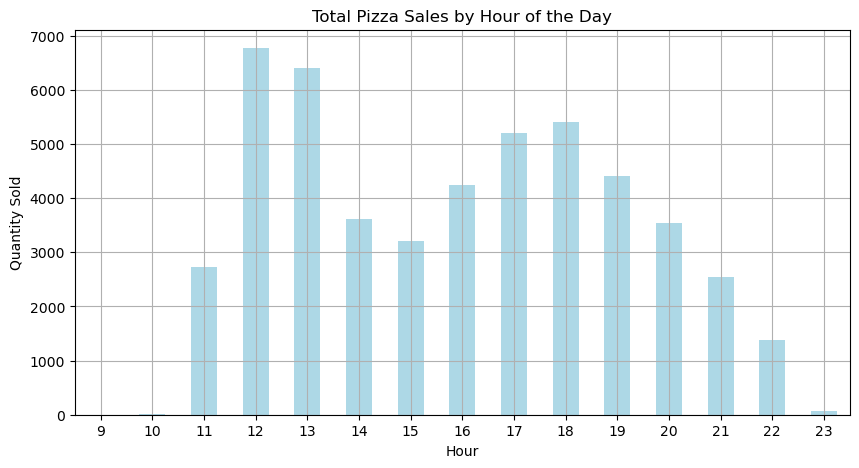

In [42]:
# Extract the hour from order_time
sales['hour'] = pd.to_datetime(sales['order_time'].astype(str)).dt.hour

# Group by hour to get sales by time of day
hourly_sales = sales.groupby('hour')['quantity'].sum()

#hourly sales
plt.figure(figsize=(10, 5))
hourly_sales.plot(kind='bar', color='lightblue')
plt.title('Total Pizza Sales by Hour of the Day')
plt.xlabel('Hour')
plt.ylabel('Quantity Sold')
plt.xticks(rotation=0)
plt.grid()
plt.show()


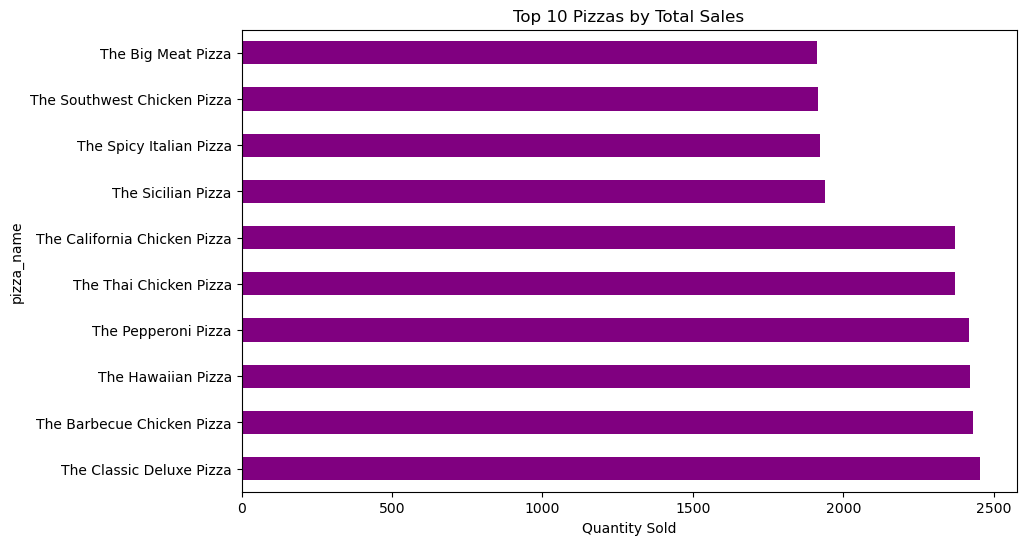

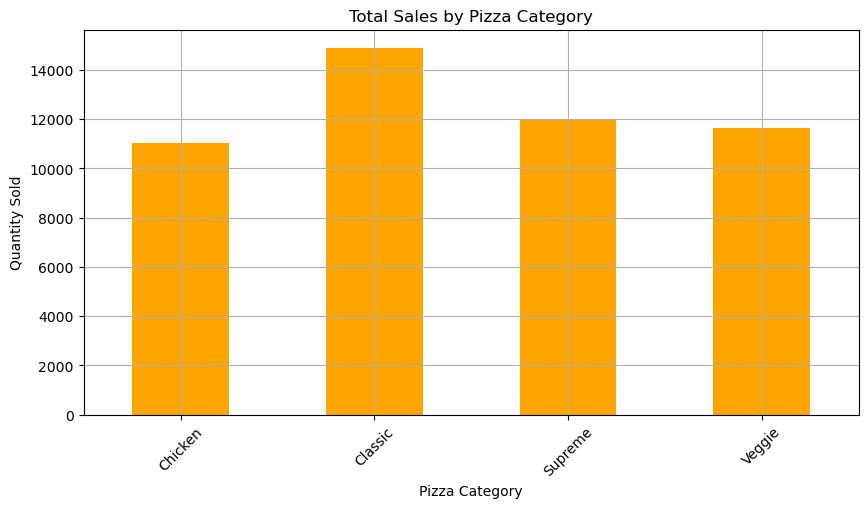

In [44]:
# Top 10 pizzas by sales quantity
top_pizzas = sales.groupby('pizza_name')['quantity'].sum().sort_values(ascending=False).head(10)

#top 10 pizzas
plt.figure(figsize=(10, 6))
top_pizzas.plot(kind='barh', color='purple')
plt.title('Top 10 Pizzas by Total Sales')
plt.xlabel('Quantity Sold')
plt.show()

# Sales distribution by pizza category
category_sales = sales.groupby('pizza_category')['quantity'].sum()

#sales by category
plt.figure(figsize=(10, 5))
category_sales.plot(kind='bar', color='orange')
plt.title('Total Sales by Pizza Category')
plt.ylabel('Quantity Sold')
plt.xlabel('Pizza Category')
plt.xticks(rotation=45)
plt.grid()
plt.show()


In [46]:
# Extracting date features
sales['year'] = sales['order_date'].dt.year
sales['month'] = sales['order_date'].dt.month 
sales['month_name'] = sales['order_date'].dt.month_name() 
sales['day'] = sales['order_date'].dt.day
sales['day_of_week'] = sales['order_date'].dt.dayofweek
sales['day_of_week_name'] = sales['order_date'].dt.day_name()  


In [48]:
print(sales)


       pizza_id  order_id  pizza_name_id  quantity order_date order_time  \
0             1         1     hawaiian_m         1 2015-01-01   11:38:36   
1             2         2  classic_dlx_m         1 2015-01-01   11:57:40   
2             3         2  five_cheese_l         1 2015-01-01   11:57:40   
3             4         2    ital_supr_l         1 2015-01-01   11:57:40   
4             5         2     mexicana_m         1 2015-01-01   11:57:40   
...         ...       ...            ...       ...        ...        ...   
48615     48616     21348  ckn_alfredo_m         1 2015-12-31   21:23:10   
48616     48617     21348  four_cheese_l         1 2015-12-31   21:23:10   
48617     48618     21348   napolitana_s         1 2015-12-31   21:23:10   
48618     48619     21349     mexicana_l         1 2015-12-31   22:09:54   
48619     48620     21350      bbq_ckn_s         1 2015-12-31   23:02:05   

       unit_price  total_price pizza_size pizza_category  \
0           13.25        13

In [24]:
sales['order_date'] = pd.to_datetime(sales['order_date'])

# Aggregate sales
aggregated_sales = sales.groupby(['order_date', 'pizza_name_id'])['quantity'].sum().reset_index()

#pivot table
pivot_sales = aggregated_sales.pivot(index='order_date', columns='pizza_name_id', values='quantity').fillna(0)

#dictionary to hold separate DataFrames
pizza_dfs = {}
for pizza_id in pivot_sales.columns:
    pizza_df = pivot_sales[[pizza_id]].copy() 
    pizza_df.rename(columns={pizza_id: 'total_quantity'}, inplace=True)
    pizza_df.reset_index(inplace=True)
    pizza_df.set_index('order_date', inplace=True)
    pizza_dfs[pizza_id] = pizza_df  # Store in dictionary

In [28]:
pivot_sales

pizza_name_id,bbq_ckn_l,bbq_ckn_m,bbq_ckn_s,big_meat_s,brie_carre_s,calabrese_l,calabrese_m,calabrese_s,cali_ckn_l,cali_ckn_m,...,thai_ckn_m,thai_ckn_s,the_greek_l,the_greek_m,the_greek_s,the_greek_xl,the_greek_xxl,veggie_veg_l,veggie_veg_m,veggie_veg_s
order_date,,,,,,,,,,,,,,,,,,,,,
2015-01-01,6.0,4.0,1.0,5.0,0.0,0.0,1.0,0.0,2.0,1.0,...,2.0,0.0,0.0,0.0,4.0,1.0,0.0,1.0,0.0,2.0
2015-01-02,4.0,7.0,1.0,9.0,3.0,2.0,5.0,0.0,4.0,9.0,...,1.0,1.0,1.0,1.0,0.0,2.0,0.0,1.0,0.0,0.0
2015-01-03,2.0,0.0,0.0,3.0,1.0,0.0,1.0,0.0,1.0,4.0,...,0.0,2.0,0.0,1.0,1.0,1.0,0.0,3.0,1.0,2.0
2015-01-04,0.0,2.0,0.0,3.0,0.0,1.0,1.0,0.0,2.0,1.0,...,1.0,0.0,0.0,2.0,2.0,2.0,0.0,0.0,2.0,3.0
2015-01-05,2.0,2.0,2.0,1.0,1.0,1.0,2.0,1.0,5.0,5.0,...,3.0,2.0,1.0,2.0,1.0,1.0,0.0,2.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-12-27,1.0,3.0,0.0,5.0,1.0,0.0,1.0,0.0,2.0,1.0,...,1.0,0.0,1.0,0.0,2.0,0.0,0.0,2.0,4.0,3.0
2015-12-28,0.0,1.0,1.0,3.0,1.0,0.0,1.0,0.0,2.0,1.0,...,1.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0
2015-12-29,1.0,3.0,0.0,6.0,1.0,2.0,0.0,0.0,1.0,4.0,...,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0


In [32]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
from prophet import Prophet
from sklearn.metrics import mean_absolute_percentage_error

def calculate_mape(actual, predicted):
    return mean_absolute_percentage_error(actual, predicted) * 100

#prediction period
prediction_period = 7

# Iterate over each pizza_name_id in the pivot table
results = {}
for pizza_id in pivot_sales.columns:
    pizza_data = pivot_sales[[pizza_id]].copy()
    pizza_data.rename(columns={pizza_id: 'total_quantity'}, inplace=True)
    pizza_data.reset_index(inplace=True)
    
    #(70-30 split)
    train_size = int(len(pizza_data) * 0.7)
    train, test = pizza_data[:train_size], pizza_data[train_size:]

    # ARIMA model
    arima_model = ARIMA(train['total_quantity'], order=(1, 1, 1))  
    arima_result = arima_model.fit()
    arima_forecast = arima_result.forecast(steps=prediction_period)
    
    # SARIMA model
    sarima_model = auto_arima(train['total_quantity'], seasonal=True, m=12)
    sarima_forecast = sarima_model.predict(n_periods=prediction_period)
    
    # Prophet model
    prophet_df = train.rename(columns={'order_date': 'ds', 'total_quantity': 'y'})
    prophet_model = Prophet()
    prophet_model.fit(prophet_df)
    future = prophet_model.make_future_dataframe(periods=prediction_period)
    prophet_forecast = prophet_model.predict(future)
    
    # Calculate MAPE 
    actual = test['total_quantity'].values[:prediction_period]
    arima_mape = calculate_mape(actual, arima_forecast)
    sarima_mape = calculate_mape(actual, sarima_forecast)
    prophet_mape = calculate_mape(actual, prophet_forecast['yhat'].values[-prediction_period:])
    
    #results
    results[pizza_id] = {
        'ARIMA_MAPE': arima_mape,
        'SARIMA_MAPE': sarima_mape,
        'Prophet_MAPE': prophet_mape,
        'ARIMA_Forecast': arima_forecast,
        'SARIMA_Forecast': sarima_forecast,
        'Prophet_Forecast': prophet_forecast['yhat'].values[-prediction_period:]
    }
results_df = pd.DataFrame(results).T
print(results_df)


23:52:45 - cmdstanpy - INFO - Chain [1] start processing
23:52:45 - cmdstanpy - INFO - Chain [1] done processing
23:52:47 - cmdstanpy - INFO - Chain [1] start processing
23:52:47 - cmdstanpy - INFO - Chain [1] done processing
23:52:48 - cmdstanpy - INFO - Chain [1] start processing
23:52:48 - cmdstanpy - INFO - Chain [1] done processing
23:52:50 - cmdstanpy - INFO - Chain [1] start processing
23:52:50 - cmdstanpy - INFO - Chain [1] done processing
23:52:52 - cmdstanpy - INFO - Chain [1] start processing
23:52:52 - cmdstanpy - INFO - Chain [1] done processing
23:52:53 - cmdstanpy - INFO - Chain [1] start processing
23:52:53 - cmdstanpy - INFO - Chain [1] done processing
23:52:55 - cmdstanpy - INFO - Chain [1] start processing
23:52:55 - cmdstanpy - INFO - Chain [1] done processing
23:52:56 - cmdstanpy - INFO - Chain [1] start processing
23:52:56 - cmdstanpy - INFO - Chain [1] done processing
23:52:57 - cmdstanpy - INFO - Chain [1] start processing
23:52:57 - cmdstanpy - INFO - Chain [1]

                         ARIMA_MAPE           SARIMA_MAPE  \
bbq_ckn_l                 49.982243             47.375875   
bbq_ckn_m      348508339394696832.0  348449936883408896.0   
bbq_ckn_s      179026464872098368.0  176541105392923584.0   
big_meat_s                 22.71221             24.055329   
brie_carre_s   169382906225049824.0  169417841964258688.0   
...                             ...                   ...   
the_greek_xl   198686918830654560.0  178261960431130688.0   
the_greek_xxl   28776563638337724.0   30624477422252208.0   
veggie_veg_l   289056295587386624.0  303671289159839360.0   
veggie_veg_m   226935318409487264.0  226981421219473216.0   
veggie_veg_s   163430947408586816.0  166761860487776192.0   

                       Prophet_MAPE  \
bbq_ckn_l                 43.856553   
bbq_ckn_m      327599223889097600.0   
bbq_ckn_s      159075210189532032.0   
big_meat_s                 21.74355   
brie_carre_s   191108659172349536.0   
...                             .

In [52]:
import pandas as pd

# Ensure 'order_date' is in datetime format
sales['order_date'] = pd.to_datetime(sales['order_date'])

# Set 'order_date' as index
sales.set_index('order_date', inplace=True)

# Group by pizza_name_id and resample by week to sum the 'quantity'
weekly_sales = sales.groupby('pizza_name_id').resample('W').agg({'quantity': 'sum'}).reset_index()


print(weekly_sales.head())


  pizza_name_id order_date  quantity
0     bbq_ckn_l 2015-01-04        12
1     bbq_ckn_l 2015-01-11        25
2     bbq_ckn_l 2015-01-18        24
3     bbq_ckn_l 2015-01-25        15
4     bbq_ckn_l 2015-02-01        27


In [54]:
weekly_sales

,pizza_name_id,order_date,quantity
0,bbq_ckn_l,2015-01-04,12
1,bbq_ckn_l,2015-01-11,25
2,bbq_ckn_l,2015-01-18,24
3,bbq_ckn_l,2015-01-25,15
4,bbq_ckn_l,2015-02-01,27
...,...,...,...
4802,veggie_veg_s,2015-12-06,10
4803,veggie_veg_s,2015-12-13,7
4804,veggie_veg_s,2015-12-20,6
4805,veggie_veg_s,2015-12-27,6


In [56]:
# Create an empty dictionary to hold the dataframes
pizza_dataframes = {}

# Loop over each unique pizza_name_id and create a separate dataframe
for pizza_id in weekly_sales['pizza_name_id'].unique():
    # Filter the rows for the current pizza_name_id
    pizza_dataframes[pizza_id] = weekly_sales[weekly_sales['pizza_name_id'] == pizza_id].reset_index(drop=True)

# Now pizza_dataframes contains a separate dataframe for each pizza_name_id
# For example, you can access the dataframe for 'bbq_ckn_l' like this:
print(pizza_dataframes['bbq_ckn_l'].head())


  pizza_name_id order_date  quantity
0     bbq_ckn_l 2015-01-04        12
1     bbq_ckn_l 2015-01-11        25
2     bbq_ckn_l 2015-01-18        24
3     bbq_ckn_l 2015-01-25        15
4     bbq_ckn_l 2015-02-01        27


In [60]:
pizza_dataframes['bbq_ckn_l']

,pizza_name_id,order_date,quantity
0,bbq_ckn_l,2015-01-04,12
1,bbq_ckn_l,2015-01-11,25
2,bbq_ckn_l,2015-01-18,24
3,bbq_ckn_l,2015-01-25,15
4,bbq_ckn_l,2015-02-01,27
5,bbq_ckn_l,2015-02-08,17
6,bbq_ckn_l,2015-02-15,33
7,bbq_ckn_l,2015-02-22,16
8,bbq_ckn_l,2015-03-01,19
9,bbq_ckn_l,2015-03-08,21


In [72]:
pizza_dataframes['calabrese_s']

,pizza_name_id,order_date,quantity
0,calabrese_s,2015-01-11,4
1,calabrese_s,2015-01-18,2
2,calabrese_s,2015-01-25,2
3,calabrese_s,2015-02-01,0
4,calabrese_s,2015-02-08,2
5,calabrese_s,2015-02-15,1
6,calabrese_s,2015-02-22,3
7,calabrese_s,2015-03-01,1
8,calabrese_s,2015-03-08,1
9,calabrese_s,2015-03-15,1


In [102]:
import pandas as pd

# Function to treat outliers using IQR method
def treat_outliers(df):
    Q1 = df['quantity'].quantile(0.25)
    Q3 = df['quantity'].quantile(0.75)
    IQR = Q3 - Q1
    # Define lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Replace outliers with NaN or clip them to the bounds
    df['quantity'] = df['quantity'].clip(lower=lower_bound, upper=upper_bound)
    return df

# Create an empty dictionary to hold the dataframes
pizza_dataframes = {}

# Loop over each unique pizza_name_id and create a separate dataframe
for pizza_id in weekly_sales['pizza_name_id'].unique():
    # Filter the rows for the current pizza_name_id
    pizza_df = weekly_sales[weekly_sales['pizza_name_id'] == pizza_id].reset_index(drop=True)
    # Treat outliers in the 'quantity' column
    pizza_dataframes[pizza_id] = treat_outliers(pizza_df)


In [106]:
import numpy as np
import pandas as pd
from prophet import Prophet

def mean_absolute_percentage_error(y_true, y_pred):
    # Avoid division by zero or near-zero values by adding a small epsilon to y_true
    epsilon = 1e-10
    y_true = y_true.clip(lower=epsilon)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def train_and_forecast_prophet(df, pizza_name):
    # Ensure the data is sorted by date
    df = df.sort_values('order_date')
    
    # Create a zero sales flag (1 if quantity is 0 or near-zero, else 0)
    df['zero_sales_flag'] = (df['quantity'] <= 1).astype(int)  # Adjust the threshold as needed

    # Filter out zero or near-zero sales for training
    df = df[df['quantity'] > 1]

    # Rename columns for Prophet
    df.rename(columns={'order_date': 'ds', 'quantity': 'y'}, inplace=True)
    
    # Split data (first 10 months for training, last 2 months for testing)
    train_df = df[df['ds'] < '2015-11-01']  # First 10 months
    test_df = df[df['ds'] >= '2015-11-01']  # Last 2 months
    
    # Train the Prophet model
    model = Prophet()
    model.fit(train_df)
    
    # Make predictions on the test set
    future = model.make_future_dataframe(periods=len(test_df), freq='D')  # Daily predictions for test set
    forecast = model.predict(future)
    
    # Merge the forecast with the actual test data for MAPE calculation
    forecast_test = forecast[['ds', 'yhat']].set_index('ds').join(test_df.set_index('ds'))
    forecast_test.dropna(inplace=True)  # Drop any NaN values
    
    # Calculate MAPE on the test set using the custom function
    mape = mean_absolute_percentage_error(forecast_test['y'], forecast_test['yhat'])
    
    # Forecast the next week after the end of dataset
    last_date = df['ds'].max()  # Get the last date from the dataset
    future_next_week = model.make_future_dataframe(periods=7, freq='D', include_history=False)
    future_next_week['ds'] = pd.date_range(start=last_date + pd.Timedelta(1, unit='D'), periods=7, freq='D')
    forecast_next_week = model.predict(future_next_week)

    # Aggregate daily predictions into weekly totals
    weekly_forecast = forecast_next_week.groupby(pd.Grouper(key='ds', freq='W')).sum()
    
    print(f"Pizza: {pizza_name}")
    print(f"MAPE: {mape:.2f}%")
    print("Next Week's Forecast:")
    print(weekly_forecast[['yhat']])  # Print the aggregated weekly forecast
    print("\n")

# Loop over all dataframes (assuming they are stored in a dictionary of dataframes)
for pizza_name, df in pizza_dataframes.items():
    train_and_forecast_prophet(df, pizza_name)



19:35:38 - cmdstanpy - INFO - Chain [1] start processing
19:35:38 - cmdstanpy - INFO - Chain [1] done processing
19:35:38 - cmdstanpy - INFO - Chain [1] start processing
19:35:38 - cmdstanpy - INFO - Chain [1] done processing
19:35:38 - cmdstanpy - INFO - Chain [1] start processing
19:35:38 - cmdstanpy - INFO - Chain [1] done processing
19:35:38 - cmdstanpy - INFO - Chain [1] start processing


Pizza: bbq_ckn_l
MAPE: 47.92%
Next Week's Forecast:
                  yhat
ds                    
2016-01-10  106.086425


Pizza: bbq_ckn_m
MAPE: 29.60%
Next Week's Forecast:
                  yhat
ds                    
2016-01-10  126.528881


Pizza: bbq_ckn_s
MAPE: 0.10%
Next Week's Forecast:
                 yhat
ds                   
2016-01-10  62.448044




19:35:39 - cmdstanpy - INFO - Chain [1] done processing
19:35:39 - cmdstanpy - INFO - Chain [1] start processing
19:35:39 - cmdstanpy - INFO - Chain [1] done processing
19:35:39 - cmdstanpy - INFO - Chain [1] start processing
19:35:39 - cmdstanpy - INFO - Chain [1] done processing
19:35:39 - cmdstanpy - INFO - Chain [1] start processing


Pizza: big_meat_s
MAPE: 19.58%
Next Week's Forecast:
                 yhat
ds                   
2016-01-10  272.36283


Pizza: brie_carre_s
MAPE: 5.67%
Next Week's Forecast:
                yhat
ds                  
2016-01-10  68.06323


Pizza: calabrese_l
MAPE: 3.75%
Next Week's Forecast:
                 yhat
ds                   
2016-01-10  40.699603




19:35:39 - cmdstanpy - INFO - Chain [1] done processing
19:35:39 - cmdstanpy - INFO - Chain [1] start processing
19:35:39 - cmdstanpy - INFO - Chain [1] done processing
19:35:39 - cmdstanpy - INFO - Chain [1] start processing
19:35:39 - cmdstanpy - INFO - Chain [1] done processing
19:35:39 - cmdstanpy - INFO - Chain [1] start processing


Pizza: calabrese_m
MAPE: 10.76%
Next Week's Forecast:
                 yhat
ds                   
2016-01-10  75.839487


Pizza: calabrese_s
MAPE: nan%
Next Week's Forecast:
                 yhat
ds                   
2015-12-13  21.867794


Pizza: cali_ckn_l
MAPE: 68.68%
Next Week's Forecast:
                  yhat
ds                    
2016-01-10  132.450697




19:35:39 - cmdstanpy - INFO - Chain [1] done processing
19:35:39 - cmdstanpy - INFO - Chain [1] start processing
19:35:39 - cmdstanpy - INFO - Chain [1] done processing
19:35:39 - cmdstanpy - INFO - Chain [1] start processing
19:35:39 - cmdstanpy - INFO - Chain [1] done processing
19:35:39 - cmdstanpy - INFO - Chain [1] start processing
19:35:39 - cmdstanpy - INFO - Chain [1] done processing


Pizza: cali_ckn_m
MAPE: 45.84%
Next Week's Forecast:
                  yhat
ds                    
2016-01-10  119.263646


Pizza: cali_ckn_s
MAPE: 17.36%
Next Week's Forecast:
                 yhat
ds                   
2016-01-10  62.417897


Pizza: ckn_alfredo_l
MAPE: nan%
Next Week's Forecast:
                 yhat
ds                   
2016-01-03  29.584004




19:35:39 - cmdstanpy - INFO - Chain [1] start processing
19:35:39 - cmdstanpy - INFO - Chain [1] done processing
19:35:39 - cmdstanpy - INFO - Chain [1] start processing
19:35:39 - cmdstanpy - INFO - Chain [1] done processing
19:35:39 - cmdstanpy - INFO - Chain [1] start processing


Pizza: ckn_alfredo_m
MAPE: 9.73%
Next Week's Forecast:
                  yhat
ds                    
2016-01-10  101.619787


Pizza: ckn_alfredo_s
MAPE: nan%
Next Week's Forecast:
                 yhat
ds                   
2015-12-27  23.600387


Pizza: ckn_pesto_l
MAPE: 20.28%
Next Week's Forecast:
                yhat
ds                  
2016-01-03  48.82103




19:35:40 - cmdstanpy - INFO - Chain [1] done processing
19:35:40 - cmdstanpy - INFO - Chain [1] start processing
19:35:40 - cmdstanpy - INFO - Chain [1] done processing
19:35:40 - cmdstanpy - INFO - Chain [1] start processing
19:35:40 - cmdstanpy - INFO - Chain [1] done processing
19:35:40 - cmdstanpy - INFO - Chain [1] start processing


Pizza: ckn_pesto_m
MAPE: 18.91%
Next Week's Forecast:
                 yhat
ds                   
2016-01-10  32.168104


Pizza: ckn_pesto_s
MAPE: 30.80%
Next Week's Forecast:
                 yhat
ds                   
2016-01-10  37.700135


Pizza: classic_dlx_l
MAPE: 16.12%
Next Week's Forecast:
                 yhat
ds                   
2016-01-10  66.190058




19:35:40 - cmdstanpy - INFO - Chain [1] done processing
19:35:40 - cmdstanpy - INFO - Chain [1] start processing
19:35:40 - cmdstanpy - INFO - Chain [1] done processing
19:35:40 - cmdstanpy - INFO - Chain [1] start processing
19:35:40 - cmdstanpy - INFO - Chain [1] done processing
19:35:40 - cmdstanpy - INFO - Chain [1] start processing
19:35:40 - cmdstanpy - INFO - Chain [1] done processing


Pizza: classic_dlx_m
MAPE: 6.03%
Next Week's Forecast:
                  yhat
ds                    
2016-01-10  158.399772


Pizza: classic_dlx_s
MAPE: 28.16%
Next Week's Forecast:
                  yhat
ds                    
2016-01-10  120.679092


Pizza: five_cheese_l
MAPE: 20.36%
Next Week's Forecast:
                  yhat
ds                    
2016-01-10  171.826266




19:35:40 - cmdstanpy - INFO - Chain [1] start processing
19:35:40 - cmdstanpy - INFO - Chain [1] done processing
19:35:40 - cmdstanpy - INFO - Chain [1] start processing
19:35:40 - cmdstanpy - INFO - Chain [1] done processing
19:35:40 - cmdstanpy - INFO - Chain [1] start processing


Pizza: four_cheese_l
MAPE: 26.44%
Next Week's Forecast:
                  yhat
ds                    
2016-01-10  176.902062


Pizza: four_cheese_m
MAPE: 20.63%
Next Week's Forecast:
                 yhat
ds                   
2016-01-10  78.055159


Pizza: green_garden_l
MAPE: nan%
Next Week's Forecast:
                 yhat
ds                   
2016-01-03  21.108184




19:35:40 - cmdstanpy - INFO - Chain [1] done processing
19:35:40 - cmdstanpy - INFO - Chain [1] start processing
19:35:40 - cmdstanpy - INFO - Chain [1] done processing
19:35:40 - cmdstanpy - INFO - Chain [1] start processing
19:35:41 - cmdstanpy - INFO - Chain [1] done processing


Pizza: green_garden_m
MAPE: 30.66%
Next Week's Forecast:
                 yhat
ds                   
2016-01-10  45.428009


Pizza: green_garden_s
MAPE: 94.53%
Next Week's Forecast:
                yhat
ds                  
2016-01-10  81.19846




19:35:41 - cmdstanpy - INFO - Chain [1] start processing
19:35:41 - cmdstanpy - INFO - Chain [1] done processing
19:35:41 - cmdstanpy - INFO - Chain [1] start processing
19:35:41 - cmdstanpy - INFO - Chain [1] done processing
19:35:41 - cmdstanpy - INFO - Chain [1] start processing


Pizza: hawaiian_l
MAPE: 12.45%
Next Week's Forecast:
                  yhat
ds                    
2016-01-10  116.629778


Pizza: hawaiian_m
MAPE: 370.97%
Next Week's Forecast:
                 yhat
ds                   
2016-01-10  66.515665


Pizza: hawaiian_s
MAPE: 1.14%
Next Week's Forecast:
                  yhat
ds                    
2016-01-10  125.312353




19:35:41 - cmdstanpy - INFO - Chain [1] done processing
19:35:41 - cmdstanpy - INFO - Chain [1] start processing
19:35:41 - cmdstanpy - INFO - Chain [1] done processing
19:35:41 - cmdstanpy - INFO - Chain [1] start processing
19:35:41 - cmdstanpy - INFO - Chain [1] done processing
19:35:41 - cmdstanpy - INFO - Chain [1] start processing


Pizza: ital_cpcllo_l
MAPE: 85.25%
Next Week's Forecast:
                 yhat
ds                   
2016-01-10  105.03675


Pizza: ital_cpcllo_m
MAPE: 39.30%
Next Week's Forecast:
                 yhat
ds                   
2016-01-10  46.099849


Pizza: ital_cpcllo_s
MAPE: 9.92%
Next Week's Forecast:
                 yhat
ds                   
2016-01-10  26.601408




19:35:41 - cmdstanpy - INFO - Chain [1] done processing
19:35:41 - cmdstanpy - INFO - Chain [1] start processing
19:35:41 - cmdstanpy - INFO - Chain [1] done processing
19:35:41 - cmdstanpy - INFO - Chain [1] start processing
19:35:41 - cmdstanpy - INFO - Chain [1] done processing
19:35:41 - cmdstanpy - INFO - Chain [1] start processing


Pizza: ital_supr_l
MAPE: 40.21%
Next Week's Forecast:
                 yhat
ds                   
2016-01-10  97.570639


Pizza: ital_supr_m
MAPE: 21.55%
Next Week's Forecast:
                  yhat
ds                    
2016-01-10  116.042062


Pizza: ital_supr_s
MAPE: nan%
Next Week's Forecast:
                 yhat
ds                   
2016-01-03  29.784722




19:35:41 - cmdstanpy - INFO - Chain [1] done processing
19:35:41 - cmdstanpy - INFO - Chain [1] start processing
19:35:41 - cmdstanpy - INFO - Chain [1] done processing
19:35:41 - cmdstanpy - INFO - Chain [1] start processing
19:35:41 - cmdstanpy - INFO - Chain [1] done processing
19:35:42 - cmdstanpy - INFO - Chain [1] start processing


Pizza: ital_veggie_l
MAPE: nan%
Next Week's Forecast:
                 yhat
ds                   
2016-01-10  24.288378


Pizza: ital_veggie_m
MAPE: 35.62%
Next Week's Forecast:
               yhat
ds                 
2016-01-10  66.6077


Pizza: ital_veggie_s
MAPE: 199.83%
Next Week's Forecast:
                 yhat
ds                   
2016-01-10  42.488281




19:35:42 - cmdstanpy - INFO - Chain [1] done processing
19:35:42 - cmdstanpy - INFO - Chain [1] start processing
19:35:42 - cmdstanpy - INFO - Chain [1] done processing
19:35:42 - cmdstanpy - INFO - Chain [1] start processing
19:35:42 - cmdstanpy - INFO - Chain [1] done processing
19:35:42 - cmdstanpy - INFO - Chain [1] start processing


Pizza: mediterraneo_l
MAPE: 12.42%
Next Week's Forecast:
                 yhat
ds                   
2016-01-03  46.392243


Pizza: mediterraneo_m
MAPE: 31.34%
Next Week's Forecast:
                 yhat
ds                   
2016-01-10  33.613252


Pizza: mediterraneo_s
MAPE: 63.39%
Next Week's Forecast:
                 yhat
ds                   
2016-01-10  48.409542




19:35:42 - cmdstanpy - INFO - Chain [1] done processing
19:35:42 - cmdstanpy - INFO - Chain [1] start processing
19:35:42 - cmdstanpy - INFO - Chain [1] done processing
19:35:42 - cmdstanpy - INFO - Chain [1] start processing
19:35:42 - cmdstanpy - INFO - Chain [1] done processing
19:35:42 - cmdstanpy - INFO - Chain [1] start processing


Pizza: mexicana_l
MAPE: 9.56%
Next Week's Forecast:
                  yhat
ds                    
2016-01-10  113.391222


Pizza: mexicana_m
MAPE: 5.58%
Next Week's Forecast:
                 yhat
ds                   
2016-01-10  59.279604


Pizza: mexicana_s
MAPE: 17.36%
Next Week's Forecast:
                 yhat
ds                   
2016-01-03  24.493361




19:35:42 - cmdstanpy - INFO - Chain [1] done processing
19:35:42 - cmdstanpy - INFO - Chain [1] start processing
19:35:42 - cmdstanpy - INFO - Chain [1] done processing
19:35:42 - cmdstanpy - INFO - Chain [1] start processing
19:35:42 - cmdstanpy - INFO - Chain [1] done processing
19:35:42 - cmdstanpy - INFO - Chain [1] start processing


Pizza: napolitana_l
MAPE: 34.66%
Next Week's Forecast:
                 yhat
ds                   
2016-01-10  73.590438


Pizza: napolitana_m
MAPE: 19.11%
Next Week's Forecast:
                 yhat
ds                   
2016-01-10  70.435712


Pizza: napolitana_s
MAPE: 11.72%
Next Week's Forecast:
                 yhat
ds                   
2016-01-10  73.050043




19:35:42 - cmdstanpy - INFO - Chain [1] done processing
19:35:42 - cmdstanpy - INFO - Chain [1] start processing
19:35:42 - cmdstanpy - INFO - Chain [1] done processing
19:35:43 - cmdstanpy - INFO - Chain [1] start processing
19:35:43 - cmdstanpy - INFO - Chain [1] done processing
19:35:43 - cmdstanpy - INFO - Chain [1] start processing


Pizza: pep_msh_pep_l
MAPE: 8.81%
Next Week's Forecast:
                 yhat
ds                   
2016-01-10  53.657541


Pizza: pep_msh_pep_m
MAPE: 83.38%
Next Week's Forecast:
                yhat
ds                  
2016-01-10  50.52499


Pizza: pep_msh_pep_s
MAPE: 43.78%
Next Week's Forecast:
                 yhat
ds                   
2016-01-10  80.414493




19:35:43 - cmdstanpy - INFO - Chain [1] done processing
19:35:43 - cmdstanpy - INFO - Chain [1] start processing
19:35:43 - cmdstanpy - INFO - Chain [1] done processing
19:35:43 - cmdstanpy - INFO - Chain [1] start processing
19:35:43 - cmdstanpy - INFO - Chain [1] done processing
19:35:43 - cmdstanpy - INFO - Chain [1] start processing


Pizza: pepperoni_l
MAPE: 0.49%
Next Week's Forecast:
                 yhat
ds                   
2016-01-10  86.908154


Pizza: pepperoni_m
MAPE: 22.81%
Next Week's Forecast:
                  yhat
ds                    
2016-01-10  139.437323


Pizza: pepperoni_s
MAPE: 32.37%
Next Week's Forecast:
                  yhat
ds                    
2016-01-10  101.685916




19:35:43 - cmdstanpy - INFO - Chain [1] done processing
19:35:43 - cmdstanpy - INFO - Chain [1] start processing
19:35:43 - cmdstanpy - INFO - Chain [1] done processing
19:35:43 - cmdstanpy - INFO - Chain [1] start processing
19:35:43 - cmdstanpy - INFO - Chain [1] done processing
19:35:43 - cmdstanpy - INFO - Chain [1] start processing
19:35:43 - cmdstanpy - INFO - Chain [1] done processing


Pizza: peppr_salami_l
MAPE: 21.86%
Next Week's Forecast:
                 yhat
ds                   
2016-01-10  93.557765


Pizza: peppr_salami_m
MAPE: 40.21%
Next Week's Forecast:
                 yhat
ds                   
2016-01-10  53.437917


Pizza: peppr_salami_s
MAPE: 16.58%
Next Week's Forecast:
                 yhat
ds                   
2016-01-10  32.035043




19:35:43 - cmdstanpy - INFO - Chain [1] start processing
19:35:43 - cmdstanpy - INFO - Chain [1] done processing
19:35:43 - cmdstanpy - INFO - Chain [1] start processing
19:35:43 - cmdstanpy - INFO - Chain [1] done processing
19:35:43 - cmdstanpy - INFO - Chain [1] start processing


Pizza: prsc_argla_l
MAPE: 9.26%
Next Week's Forecast:
                yhat
ds                  
2016-01-03  62.03408


Pizza: prsc_argla_m
MAPE: 4.26%
Next Week's Forecast:
                 yhat
ds                   
2016-01-10  81.624519


Pizza: prsc_argla_s
MAPE: 24.27%
Next Week's Forecast:
                 yhat
ds                   
2016-01-10  51.368647




19:35:43 - cmdstanpy - INFO - Chain [1] done processing
19:35:43 - cmdstanpy - INFO - Chain [1] start processing
19:35:43 - cmdstanpy - INFO - Chain [1] done processing
19:35:44 - cmdstanpy - INFO - Chain [1] start processing
19:35:44 - cmdstanpy - INFO - Chain [1] done processing
19:35:44 - cmdstanpy - INFO - Chain [1] start processing


Pizza: sicilian_l
MAPE: 8.27%
Next Week's Forecast:
                 yhat
ds                   
2016-01-10  76.458926


Pizza: sicilian_m
MAPE: 62.83%
Next Week's Forecast:
                 yhat
ds                   
2016-01-03  80.400628


Pizza: sicilian_s
MAPE: 21.65%
Next Week's Forecast:
                 yhat
ds                   
2016-01-10  89.969717




19:35:44 - cmdstanpy - INFO - Chain [1] done processing
19:35:44 - cmdstanpy - INFO - Chain [1] start processing
19:35:44 - cmdstanpy - INFO - Chain [1] done processing
19:35:44 - cmdstanpy - INFO - Chain [1] start processing
19:35:44 - cmdstanpy - INFO - Chain [1] done processing
19:35:44 - cmdstanpy - INFO - Chain [1] start processing


Pizza: soppressata_l
MAPE: 14.48%
Next Week's Forecast:
                 yhat
ds                   
2016-01-10  56.694753


Pizza: soppressata_m
MAPE: 20.17%
Next Week's Forecast:
                 yhat
ds                   
2016-01-10  39.797002


Pizza: soppressata_s
MAPE: 18.08%
Next Week's Forecast:
                 yhat
ds                   
2016-01-10  42.245706




19:35:44 - cmdstanpy - INFO - Chain [1] done processing
19:35:44 - cmdstanpy - INFO - Chain [1] start processing
19:35:44 - cmdstanpy - INFO - Chain [1] done processing
19:35:44 - cmdstanpy - INFO - Chain [1] start processing
19:35:44 - cmdstanpy - INFO - Chain [1] done processing
19:35:44 - cmdstanpy - INFO - Chain [1] start processing


Pizza: southw_ckn_l
MAPE: 29.90%
Next Week's Forecast:
                  yhat
ds                    
2016-01-10  148.046291


Pizza: southw_ckn_m
MAPE: 2.72%
Next Week's Forecast:
                yhat
ds                  
2016-01-10  82.60377


Pizza: southw_ckn_s
MAPE: 301.60%
Next Week's Forecast:
                yhat
ds                  
2016-01-03  58.40595




19:35:44 - cmdstanpy - INFO - Chain [1] done processing
19:35:44 - cmdstanpy - INFO - Chain [1] start processing
19:35:44 - cmdstanpy - INFO - Chain [1] done processing
19:35:44 - cmdstanpy - INFO - Chain [1] start processing
19:35:44 - cmdstanpy - INFO - Chain [1] done processing
19:35:44 - cmdstanpy - INFO - Chain [1] start processing


Pizza: spicy_ital_l
MAPE: 117.78%
Next Week's Forecast:
                  yhat
ds                    
2016-01-10  173.812189


Pizza: spicy_ital_m
MAPE: 39.89%
Next Week's Forecast:
                 yhat
ds                   
2016-01-10  58.301412


Pizza: spicy_ital_s
MAPE: 43.70%
Next Week's Forecast:
                 yhat
ds                   
2016-01-10  48.372935




19:35:44 - cmdstanpy - INFO - Chain [1] done processing
19:35:45 - cmdstanpy - INFO - Chain [1] start processing
19:35:45 - cmdstanpy - INFO - Chain [1] done processing
19:35:45 - cmdstanpy - INFO - Chain [1] start processing
19:35:45 - cmdstanpy - INFO - Chain [1] done processing
19:35:45 - cmdstanpy - INFO - Chain [1] start processing


Pizza: spin_pesto_l
MAPE: 88.08%
Next Week's Forecast:
                 yhat
ds                   
2016-01-10  39.668521


Pizza: spin_pesto_m
MAPE: 30.38%
Next Week's Forecast:
                yhat
ds                  
2016-01-10  39.13213


Pizza: spin_pesto_s
MAPE: 3.55%
Next Week's Forecast:
                 yhat
ds                   
2016-01-10  39.510175




19:35:45 - cmdstanpy - INFO - Chain [1] done processing
19:35:45 - cmdstanpy - INFO - Chain [1] start processing
19:35:45 - cmdstanpy - INFO - Chain [1] done processing
19:35:45 - cmdstanpy - INFO - Chain [1] start processing
19:35:45 - cmdstanpy - INFO - Chain [1] done processing
19:35:45 - cmdstanpy - INFO - Chain [1] start processing


Pizza: spinach_fet_l
MAPE: 177.93%
Next Week's Forecast:
                 yhat
ds                   
2016-01-10  57.780171


Pizza: spinach_fet_m
MAPE: 120.95%
Next Week's Forecast:
                 yhat
ds                   
2016-01-10  77.905856


Pizza: spinach_fet_s
MAPE: 138.33%
Next Week's Forecast:
                 yhat
ds                   
2016-01-10  45.841218




19:35:45 - cmdstanpy - INFO - Chain [1] done processing
19:35:45 - cmdstanpy - INFO - Chain [1] start processing
19:35:45 - cmdstanpy - INFO - Chain [1] done processing
19:35:45 - cmdstanpy - INFO - Chain [1] start processing
19:35:45 - cmdstanpy - INFO - Chain [1] done processing
19:35:45 - cmdstanpy - INFO - Chain [1] start processing


Pizza: spinach_supr_l
MAPE: 118.31%
Next Week's Forecast:
                 yhat
ds                   
2016-01-10  47.738323


Pizza: spinach_supr_m
MAPE: 29.05%
Next Week's Forecast:
                 yhat
ds                   
2016-01-10  36.264215


Pizza: spinach_supr_s
MAPE: 18.27%
Next Week's Forecast:
                 yhat
ds                   
2016-01-03  47.512268




19:35:45 - cmdstanpy - INFO - Chain [1] done processing
19:35:45 - cmdstanpy - INFO - Chain [1] start processing
19:35:45 - cmdstanpy - INFO - Chain [1] done processing
19:35:45 - cmdstanpy - INFO - Chain [1] start processing
19:35:45 - cmdstanpy - INFO - Chain [1] done processing


Pizza: thai_ckn_l
MAPE: 2.80%
Next Week's Forecast:
                  yhat
ds                    
2016-01-10  191.674839


Pizza: thai_ckn_m
MAPE: 93.54%
Next Week's Forecast:
                 yhat
ds                   
2016-01-10  68.886419


Pizza: thai_ckn_s
MAPE: 4.67%
Next Week's Forecast:
                yhat
ds                  
2016-01-10  58.53629




19:35:46 - cmdstanpy - INFO - Chain [1] start processing
19:35:46 - cmdstanpy - INFO - Chain [1] done processing
19:35:46 - cmdstanpy - INFO - Chain [1] start processing
19:35:46 - cmdstanpy - INFO - Chain [1] done processing
19:35:46 - cmdstanpy - INFO - Chain [1] start processing
19:35:46 - cmdstanpy - INFO - Chain [1] done processing
19:35:46 - cmdstanpy - INFO - Chain [1] start processing


Pizza: the_greek_l
MAPE: 94.78%
Next Week's Forecast:
                 yhat
ds                   
2016-01-03  43.223871


Pizza: the_greek_m
MAPE: 67.04%
Next Week's Forecast:
                 yhat
ds                   
2016-01-10  33.702845


Pizza: the_greek_s
MAPE: 46.64%
Next Week's Forecast:
                yhat
ds                  
2016-01-03  41.28251




19:35:46 - cmdstanpy - INFO - Chain [1] done processing
19:35:46 - cmdstanpy - INFO - Chain [1] start processing
19:35:46 - cmdstanpy - INFO - Chain [1] done processing
19:35:46 - cmdstanpy - INFO - Chain [1] start processing
19:35:46 - cmdstanpy - INFO - Chain [1] done processing
19:35:46 - cmdstanpy - INFO - Chain [1] start processing


Pizza: the_greek_xl
MAPE: 32.38%
Next Week's Forecast:
                 yhat
ds                   
2016-01-10  74.134706


Pizza: the_greek_xxl
MAPE: nan%
Next Week's Forecast:
            yhat
ds              
2015-11-29  14.0


Pizza: veggie_veg_l
MAPE: 52.84%
Next Week's Forecast:
                 yhat
ds                   
2016-01-10  51.979277


Pizza: veggie_veg_m
MAPE: 54.96%
Next Week's Forecast:
                 yhat
ds                   
2016-01-10  72.633107




19:35:46 - cmdstanpy - INFO - Chain [1] done processing


Pizza: veggie_veg_s
MAPE: 77.20%
Next Week's Forecast:
                 yhat
ds                   
2016-01-10  61.368247




In [110]:
import numpy as np
import pandas as pd
from prophet import Prophet

def mean_absolute_error(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred) ** 2))

def train_and_forecast_prophet(df, pizza_name):
    # Ensure the data is sorted by date
    df = df.sort_values('order_date')
    
    # Create a zero sales flag (1 if quantity is 0 or near-zero, else 0)
    df['zero_sales_flag'] = (df['quantity'] <= 1).astype(int)  # Adjust the threshold as needed

    # Filter out zero or near-zero sales for training
    df = df[df['quantity'] > 1]

    # Rename columns for Prophet
    df.rename(columns={'order_date': 'ds', 'quantity': 'y'}, inplace=True)
    
    # Split data (first 10 months for training, last 2 months for testing)
    train_df = df[df['ds'] < '2015-11-01']  # First 10 months
    test_df = df[df['ds'] >= '2015-11-01']  # Last 2 months
    
    # Train the Prophet model
    model = Prophet()
    model.fit(train_df)
    
    # Make predictions on the test set
    future = model.make_future_dataframe(periods=len(test_df), freq='D')  # Daily predictions for test set
    forecast = model.predict(future)
    
    # Merge the forecast with the actual test data for error calculations
    forecast_test = forecast[['ds', 'yhat']].set_index('ds').join(test_df.set_index('ds'))
    forecast_test.dropna(inplace=True)  # Drop any NaN values
    
    # Calculate MAE and RMSE on the test set using the custom functions
    mae = mean_absolute_error(forecast_test['y'], forecast_test['yhat'])
    rmse = root_mean_squared_error(forecast_test['y'], forecast_test['yhat'])
    
    # Forecast the next week after the end of dataset
    last_date = df['ds'].max()  # Get the last date from the dataset
    future_next_week = model.make_future_dataframe(periods=7, freq='D', include_history=False)
    future_next_week['ds'] = pd.date_range(start=last_date + pd.Timedelta(1, unit='D'), periods=7, freq='D')
    forecast_next_week = model.predict(future_next_week)

    # Aggregate daily predictions into weekly totals
    weekly_forecast = forecast_next_week.groupby(pd.Grouper(key='ds', freq='W')).sum()
    
    print(f"Pizza: {pizza_name}")
    print(f"MAE: {mae:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print("Next Week's Forecast:")
    print(weekly_forecast[['yhat']])  # Print the aggregated weekly forecast
    print("\n")

# Loop over all dataframes (assuming they are stored in a dictionary of dataframes)
for pizza_name, df in pizza_dataframes.items():
    train_and_forecast_prophet(df, pizza_name)



19:44:54 - cmdstanpy - INFO - Chain [1] start processing
19:44:54 - cmdstanpy - INFO - Chain [1] done processing
19:44:54 - cmdstanpy - INFO - Chain [1] start processing
19:44:54 - cmdstanpy - INFO - Chain [1] done processing
19:44:54 - cmdstanpy - INFO - Chain [1] start processing
19:44:54 - cmdstanpy - INFO - Chain [1] done processing
19:44:54 - cmdstanpy - INFO - Chain [1] start processing


Pizza: bbq_ckn_l
MAE: 5.27
RMSE: 5.27
Next Week's Forecast:
                  yhat
ds                    
2016-01-10  106.086425


Pizza: bbq_ckn_m
MAE: 4.14
RMSE: 4.14
Next Week's Forecast:
                  yhat
ds                    
2016-01-10  126.528881


Pizza: bbq_ckn_s
MAE: 0.01
RMSE: 0.01
Next Week's Forecast:
                 yhat
ds                   
2016-01-10  62.448044




19:44:54 - cmdstanpy - INFO - Chain [1] done processing
19:44:54 - cmdstanpy - INFO - Chain [1] start processing
19:44:54 - cmdstanpy - INFO - Chain [1] done processing
19:44:54 - cmdstanpy - INFO - Chain [1] start processing
19:44:54 - cmdstanpy - INFO - Chain [1] done processing
19:44:54 - cmdstanpy - INFO - Chain [1] start processing


Pizza: big_meat_s
MAE: 6.27
RMSE: 6.27
Next Week's Forecast:
                 yhat
ds                   
2016-01-10  272.36283


Pizza: brie_carre_s
MAE: 0.51
RMSE: 0.51
Next Week's Forecast:
                yhat
ds                  
2016-01-10  68.06323


Pizza: calabrese_l
MAE: 0.23
RMSE: 0.23
Next Week's Forecast:
                 yhat
ds                   
2016-01-10  40.699603




19:44:54 - cmdstanpy - INFO - Chain [1] done processing
19:44:54 - cmdstanpy - INFO - Chain [1] start processing
19:44:54 - cmdstanpy - INFO - Chain [1] done processing
19:44:54 - cmdstanpy - INFO - Chain [1] start processing
19:44:55 - cmdstanpy - INFO - Chain [1] done processing


Pizza: calabrese_m
MAE: 1.29
RMSE: 1.29
Next Week's Forecast:
                 yhat
ds                   
2016-01-10  75.839487


Pizza: calabrese_s
MAE: nan
RMSE: nan
Next Week's Forecast:
                 yhat
ds                   
2015-12-13  21.867794


Pizza: cali_ckn_l
MAE: 7.55
RMSE: 7.55
Next Week's Forecast:
                  yhat
ds                    
2016-01-10  132.450697




19:44:55 - cmdstanpy - INFO - Chain [1] start processing
19:44:55 - cmdstanpy - INFO - Chain [1] done processing
19:44:55 - cmdstanpy - INFO - Chain [1] start processing
19:44:55 - cmdstanpy - INFO - Chain [1] done processing
19:44:55 - cmdstanpy - INFO - Chain [1] start processing
19:44:55 - cmdstanpy - INFO - Chain [1] done processing
19:44:55 - cmdstanpy - INFO - Chain [1] start processing
19:44:55 - cmdstanpy - INFO - Chain [1] done processing


Pizza: cali_ckn_m
MAE: 5.50
RMSE: 5.50
Next Week's Forecast:
                  yhat
ds                    
2016-01-10  119.263646


Pizza: cali_ckn_s
MAE: 1.91
RMSE: 1.91
Next Week's Forecast:
                 yhat
ds                   
2016-01-10  62.417897


Pizza: ckn_alfredo_l
MAE: nan
RMSE: nan
Next Week's Forecast:
                 yhat
ds                   
2016-01-03  29.584004




19:44:55 - cmdstanpy - INFO - Chain [1] start processing
19:44:55 - cmdstanpy - INFO - Chain [1] done processing
19:44:55 - cmdstanpy - INFO - Chain [1] start processing
19:44:55 - cmdstanpy - INFO - Chain [1] done processing
19:44:55 - cmdstanpy - INFO - Chain [1] start processing
19:44:55 - cmdstanpy - INFO - Chain [1] done processing


Pizza: ckn_alfredo_m
MAE: 1.26
RMSE: 1.26
Next Week's Forecast:
                  yhat
ds                    
2016-01-10  101.619787


Pizza: ckn_alfredo_s
MAE: nan
RMSE: nan
Next Week's Forecast:
                 yhat
ds                   
2015-12-27  23.600387


Pizza: ckn_pesto_l
MAE: 1.83
RMSE: 1.83
Next Week's Forecast:
                yhat
ds                  
2016-01-03  48.82103




19:44:55 - cmdstanpy - INFO - Chain [1] start processing
19:44:55 - cmdstanpy - INFO - Chain [1] done processing
19:44:55 - cmdstanpy - INFO - Chain [1] start processing
19:44:55 - cmdstanpy - INFO - Chain [1] done processing
19:44:55 - cmdstanpy - INFO - Chain [1] start processing


Pizza: ckn_pesto_m
MAE: 0.76
RMSE: 0.76
Next Week's Forecast:
                 yhat
ds                   
2016-01-10  32.168104


Pizza: ckn_pesto_s
MAE: 2.46
RMSE: 2.46
Next Week's Forecast:
                 yhat
ds                   
2016-01-10  37.700135


Pizza: classic_dlx_l
MAE: 1.29
RMSE: 1.29
Next Week's Forecast:
                 yhat
ds                   
2016-01-10  66.190058




19:44:55 - cmdstanpy - INFO - Chain [1] done processing
19:44:55 - cmdstanpy - INFO - Chain [1] start processing
19:44:55 - cmdstanpy - INFO - Chain [1] done processing
19:44:55 - cmdstanpy - INFO - Chain [1] start processing
19:44:55 - cmdstanpy - INFO - Chain [1] done processing
19:44:56 - cmdstanpy - INFO - Chain [1] start processing
19:44:56 - cmdstanpy - INFO - Chain [1] done processing


Pizza: classic_dlx_m
MAE: 1.45
RMSE: 1.45
Next Week's Forecast:
                  yhat
ds                    
2016-01-10  158.399772


Pizza: classic_dlx_s
MAE: 3.66
RMSE: 3.66
Next Week's Forecast:
                  yhat
ds                    
2016-01-10  120.679092


Pizza: five_cheese_l
MAE: 4.28
RMSE: 4.28
Next Week's Forecast:
                  yhat
ds                    
2016-01-10  171.826266




19:44:56 - cmdstanpy - INFO - Chain [1] start processing
19:44:56 - cmdstanpy - INFO - Chain [1] done processing
19:44:56 - cmdstanpy - INFO - Chain [1] start processing
19:44:56 - cmdstanpy - INFO - Chain [1] done processing
19:44:56 - cmdstanpy - INFO - Chain [1] start processing
19:44:56 - cmdstanpy - INFO - Chain [1] done processing


Pizza: four_cheese_l
MAE: 5.29
RMSE: 5.29
Next Week's Forecast:
                  yhat
ds                    
2016-01-10  176.902062


Pizza: four_cheese_m
MAE: 2.89
RMSE: 2.89
Next Week's Forecast:
                 yhat
ds                   
2016-01-10  78.055159


Pizza: green_garden_l
MAE: nan
RMSE: nan
Next Week's Forecast:
                 yhat
ds                   
2016-01-03  21.108184




19:44:56 - cmdstanpy - INFO - Chain [1] start processing
19:44:56 - cmdstanpy - INFO - Chain [1] done processing
19:44:56 - cmdstanpy - INFO - Chain [1] start processing
19:44:56 - cmdstanpy - INFO - Chain [1] done processing


Pizza: green_garden_m
MAE: 2.76
RMSE: 2.76
Next Week's Forecast:
                 yhat
ds                   
2016-01-10  45.428009


Pizza: green_garden_s
MAE: 5.67
RMSE: 5.67
Next Week's Forecast:
                yhat
ds                  
2016-01-10  81.19846




19:44:56 - cmdstanpy - INFO - Chain [1] start processing
19:44:56 - cmdstanpy - INFO - Chain [1] done processing
19:44:56 - cmdstanpy - INFO - Chain [1] start processing
19:44:56 - cmdstanpy - INFO - Chain [1] done processing
19:44:56 - cmdstanpy - INFO - Chain [1] start processing


Pizza: hawaiian_l
MAE: 1.87
RMSE: 1.87
Next Week's Forecast:
                  yhat
ds                    
2016-01-10  116.629778


Pizza: hawaiian_m
MAE: 7.42
RMSE: 7.42
Next Week's Forecast:
                 yhat
ds                   
2016-01-10  66.515665


Pizza: hawaiian_s
MAE: 0.21
RMSE: 0.21
Next Week's Forecast:
                  yhat
ds                    
2016-01-10  125.312353




19:44:56 - cmdstanpy - INFO - Chain [1] done processing
19:44:56 - cmdstanpy - INFO - Chain [1] start processing
19:44:56 - cmdstanpy - INFO - Chain [1] done processing
19:44:56 - cmdstanpy - INFO - Chain [1] start processing
19:44:56 - cmdstanpy - INFO - Chain [1] done processing
19:44:56 - cmdstanpy - INFO - Chain [1] start processing


Pizza: ital_cpcllo_l
MAE: 6.82
RMSE: 6.82
Next Week's Forecast:
                 yhat
ds                   
2016-01-10  105.03675


Pizza: ital_cpcllo_m
MAE: 1.97
RMSE: 1.97
Next Week's Forecast:
                 yhat
ds                   
2016-01-10  46.099849


Pizza: ital_cpcllo_s
MAE: 0.40
RMSE: 0.40
Next Week's Forecast:
                 yhat
ds                   
2016-01-10  26.601408




19:44:57 - cmdstanpy - INFO - Chain [1] done processing
19:44:57 - cmdstanpy - INFO - Chain [1] start processing
19:44:57 - cmdstanpy - INFO - Chain [1] done processing
19:44:57 - cmdstanpy - INFO - Chain [1] start processing
19:44:57 - cmdstanpy - INFO - Chain [1] done processing
19:44:57 - cmdstanpy - INFO - Chain [1] start processing


Pizza: ital_supr_l
MAE: 4.02
RMSE: 4.02
Next Week's Forecast:
                 yhat
ds                   
2016-01-10  97.570639


Pizza: ital_supr_m
MAE: 3.02
RMSE: 3.02
Next Week's Forecast:
                  yhat
ds                    
2016-01-10  116.042062


Pizza: ital_supr_s
MAE: nan
RMSE: nan
Next Week's Forecast:
                 yhat
ds                   
2016-01-03  29.784722




19:44:57 - cmdstanpy - INFO - Chain [1] done processing
19:44:57 - cmdstanpy - INFO - Chain [1] start processing
19:44:57 - cmdstanpy - INFO - Chain [1] done processing
19:44:57 - cmdstanpy - INFO - Chain [1] start processing
19:44:57 - cmdstanpy - INFO - Chain [1] done processing
19:44:57 - cmdstanpy - INFO - Chain [1] start processing


Pizza: ital_veggie_l
MAE: nan
RMSE: nan
Next Week's Forecast:
                 yhat
ds                   
2016-01-10  24.288378


Pizza: ital_veggie_m
MAE: 2.49
RMSE: 2.49
Next Week's Forecast:
               yhat
ds                 
2016-01-10  66.6077


Pizza: ital_veggie_s
MAE: 4.00
RMSE: 4.00
Next Week's Forecast:
                 yhat
ds                   
2016-01-10  42.488281




19:44:57 - cmdstanpy - INFO - Chain [1] done processing
19:44:57 - cmdstanpy - INFO - Chain [1] start processing
19:44:57 - cmdstanpy - INFO - Chain [1] done processing
19:44:57 - cmdstanpy - INFO - Chain [1] start processing
19:44:57 - cmdstanpy - INFO - Chain [1] done processing
19:44:57 - cmdstanpy - INFO - Chain [1] start processing


Pizza: mediterraneo_l
MAE: 0.74
RMSE: 0.74
Next Week's Forecast:
                 yhat
ds                   
2016-01-03  46.392243


Pizza: mediterraneo_m
MAE: 2.19
RMSE: 2.19
Next Week's Forecast:
                 yhat
ds                   
2016-01-10  33.613252


Pizza: mediterraneo_s
MAE: 2.54
RMSE: 2.54
Next Week's Forecast:
                 yhat
ds                   
2016-01-10  48.409542




19:44:57 - cmdstanpy - INFO - Chain [1] done processing
19:44:57 - cmdstanpy - INFO - Chain [1] start processing
19:44:57 - cmdstanpy - INFO - Chain [1] done processing
19:44:57 - cmdstanpy - INFO - Chain [1] start processing
19:44:57 - cmdstanpy - INFO - Chain [1] done processing
19:44:58 - cmdstanpy - INFO - Chain [1] start processing


Pizza: mexicana_l
MAE: 1.72
RMSE: 1.72
Next Week's Forecast:
                  yhat
ds                    
2016-01-10  113.391222


Pizza: mexicana_m
MAE: 0.50
RMSE: 0.50
Next Week's Forecast:
                 yhat
ds                   
2016-01-10  59.279604


Pizza: mexicana_s
MAE: 0.52
RMSE: 0.52
Next Week's Forecast:
                 yhat
ds                   
2016-01-03  24.493361




19:44:58 - cmdstanpy - INFO - Chain [1] done processing
19:44:58 - cmdstanpy - INFO - Chain [1] start processing
19:44:58 - cmdstanpy - INFO - Chain [1] done processing
19:44:58 - cmdstanpy - INFO - Chain [1] start processing
19:44:58 - cmdstanpy - INFO - Chain [1] done processing
19:44:58 - cmdstanpy - INFO - Chain [1] start processing


Pizza: napolitana_l
MAE: 2.77
RMSE: 2.77
Next Week's Forecast:
                 yhat
ds                   
2016-01-10  73.590438


Pizza: napolitana_m
MAE: 1.53
RMSE: 1.53
Next Week's Forecast:
                 yhat
ds                   
2016-01-10  70.435712


Pizza: napolitana_s
MAE: 1.05
RMSE: 1.05
Next Week's Forecast:
                 yhat
ds                   
2016-01-10  73.050043




19:44:58 - cmdstanpy - INFO - Chain [1] done processing
19:44:58 - cmdstanpy - INFO - Chain [1] start processing
19:44:58 - cmdstanpy - INFO - Chain [1] done processing
19:44:58 - cmdstanpy - INFO - Chain [1] start processing
19:44:58 - cmdstanpy - INFO - Chain [1] done processing
19:44:58 - cmdstanpy - INFO - Chain [1] start processing


Pizza: pep_msh_pep_l
MAE: 0.62
RMSE: 0.62
Next Week's Forecast:
                 yhat
ds                   
2016-01-10  53.657541


Pizza: pep_msh_pep_m
MAE: 3.34
RMSE: 3.34
Next Week's Forecast:
                yhat
ds                  
2016-01-10  50.52499


Pizza: pep_msh_pep_s
MAE: 3.50
RMSE: 3.50
Next Week's Forecast:
                 yhat
ds                   
2016-01-10  80.414493




19:44:58 - cmdstanpy - INFO - Chain [1] done processing
19:44:58 - cmdstanpy - INFO - Chain [1] start processing
19:44:58 - cmdstanpy - INFO - Chain [1] done processing
19:44:58 - cmdstanpy - INFO - Chain [1] start processing
19:44:58 - cmdstanpy - INFO - Chain [1] done processing
19:44:58 - cmdstanpy - INFO - Chain [1] start processing


Pizza: pepperoni_l
MAE: 0.06
RMSE: 0.06
Next Week's Forecast:
                 yhat
ds                   
2016-01-10  86.908154


Pizza: pepperoni_m
MAE: 5.70
RMSE: 5.70
Next Week's Forecast:
                  yhat
ds                    
2016-01-10  139.437323


Pizza: pepperoni_s
MAE: 3.56
RMSE: 3.56
Next Week's Forecast:
                  yhat
ds                    
2016-01-10  101.685916




19:44:58 - cmdstanpy - INFO - Chain [1] done processing
19:44:58 - cmdstanpy - INFO - Chain [1] start processing
19:44:58 - cmdstanpy - INFO - Chain [1] done processing
19:44:59 - cmdstanpy - INFO - Chain [1] start processing
19:44:59 - cmdstanpy - INFO - Chain [1] done processing
19:44:59 - cmdstanpy - INFO - Chain [1] start processing
19:44:59 - cmdstanpy - INFO - Chain [1] done processing


Pizza: peppr_salami_l
MAE: 3.72
RMSE: 3.72
Next Week's Forecast:
                 yhat
ds                   
2016-01-10  93.557765


Pizza: peppr_salami_m
MAE: 5.23
RMSE: 5.23
Next Week's Forecast:
                 yhat
ds                   
2016-01-10  53.437917


Pizza: peppr_salami_s
MAE: 0.99
RMSE: 0.99
Next Week's Forecast:
                 yhat
ds                   
2016-01-10  32.035043




19:44:59 - cmdstanpy - INFO - Chain [1] start processing
19:44:59 - cmdstanpy - INFO - Chain [1] done processing
19:44:59 - cmdstanpy - INFO - Chain [1] start processing
19:44:59 - cmdstanpy - INFO - Chain [1] done processing
19:44:59 - cmdstanpy - INFO - Chain [1] start processing


Pizza: prsc_argla_l
MAE: 0.74
RMSE: 0.74
Next Week's Forecast:
                yhat
ds                  
2016-01-03  62.03408


Pizza: prsc_argla_m
MAE: 0.51
RMSE: 0.51
Next Week's Forecast:
                 yhat
ds                   
2016-01-10  81.624519


Pizza: prsc_argla_s
MAE: 2.43
RMSE: 2.43
Next Week's Forecast:
                 yhat
ds                   
2016-01-10  51.368647




19:44:59 - cmdstanpy - INFO - Chain [1] done processing
19:44:59 - cmdstanpy - INFO - Chain [1] start processing
19:44:59 - cmdstanpy - INFO - Chain [1] done processing
19:44:59 - cmdstanpy - INFO - Chain [1] start processing
19:44:59 - cmdstanpy - INFO - Chain [1] done processing
19:44:59 - cmdstanpy - INFO - Chain [1] start processing


Pizza: sicilian_l
MAE: 0.99
RMSE: 0.99
Next Week's Forecast:
                 yhat
ds                   
2016-01-10  76.458926


Pizza: sicilian_m
MAE: 4.40
RMSE: 4.40
Next Week's Forecast:
                 yhat
ds                   
2016-01-03  80.400628


Pizza: sicilian_s
MAE: 3.68
RMSE: 3.68
Next Week's Forecast:
                 yhat
ds                   
2016-01-10  89.969717




19:44:59 - cmdstanpy - INFO - Chain [1] done processing
19:44:59 - cmdstanpy - INFO - Chain [1] start processing
19:44:59 - cmdstanpy - INFO - Chain [1] done processing
19:44:59 - cmdstanpy - INFO - Chain [1] start processing
19:44:59 - cmdstanpy - INFO - Chain [1] done processing
19:44:59 - cmdstanpy - INFO - Chain [1] start processing


Pizza: soppressata_l
MAE: 1.01
RMSE: 1.01
Next Week's Forecast:
                 yhat
ds                   
2016-01-10  56.694753


Pizza: soppressata_m
MAE: 1.41
RMSE: 1.41
Next Week's Forecast:
                 yhat
ds                   
2016-01-10  39.797002


Pizza: soppressata_s
MAE: 0.90
RMSE: 0.90
Next Week's Forecast:
                 yhat
ds                   
2016-01-10  42.245706




19:44:59 - cmdstanpy - INFO - Chain [1] done processing
19:44:59 - cmdstanpy - INFO - Chain [1] start processing
19:45:00 - cmdstanpy - INFO - Chain [1] done processing
19:45:00 - cmdstanpy - INFO - Chain [1] start processing
19:45:00 - cmdstanpy - INFO - Chain [1] done processing
19:45:00 - cmdstanpy - INFO - Chain [1] start processing


Pizza: southw_ckn_l
MAE: 4.78
RMSE: 4.78
Next Week's Forecast:
                  yhat
ds                    
2016-01-10  148.046291


Pizza: southw_ckn_m
MAE: 0.30
RMSE: 0.30
Next Week's Forecast:
                yhat
ds                  
2016-01-10  82.60377


Pizza: southw_ckn_s
MAE: 6.03
RMSE: 6.03
Next Week's Forecast:
                yhat
ds                  
2016-01-03  58.40595




19:45:00 - cmdstanpy - INFO - Chain [1] done processing
19:45:00 - cmdstanpy - INFO - Chain [1] start processing
19:45:00 - cmdstanpy - INFO - Chain [1] done processing
19:45:00 - cmdstanpy - INFO - Chain [1] start processing
19:45:00 - cmdstanpy - INFO - Chain [1] done processing
19:45:00 - cmdstanpy - INFO - Chain [1] start processing


Pizza: spicy_ital_l
MAE: 12.96
RMSE: 12.96
Next Week's Forecast:
                  yhat
ds                    
2016-01-10  173.812189


Pizza: spicy_ital_m
MAE: 5.38
RMSE: 5.38
Next Week's Forecast:
                 yhat
ds                   
2016-01-10  58.301412


Pizza: spicy_ital_s
MAE: 2.19
RMSE: 2.19
Next Week's Forecast:
                 yhat
ds                   
2016-01-10  48.372935




19:45:00 - cmdstanpy - INFO - Chain [1] done processing
19:45:00 - cmdstanpy - INFO - Chain [1] start processing
19:45:00 - cmdstanpy - INFO - Chain [1] done processing
19:45:00 - cmdstanpy - INFO - Chain [1] start processing
19:45:00 - cmdstanpy - INFO - Chain [1] done processing
19:45:00 - cmdstanpy - INFO - Chain [1] start processing


Pizza: spin_pesto_l
MAE: 2.64
RMSE: 2.64
Next Week's Forecast:
                 yhat
ds                   
2016-01-10  39.668521


Pizza: spin_pesto_m
MAE: 2.43
RMSE: 2.43
Next Week's Forecast:
                yhat
ds                  
2016-01-10  39.13213


Pizza: spin_pesto_s
MAE: 0.21
RMSE: 0.21
Next Week's Forecast:
                 yhat
ds                   
2016-01-10  39.510175




19:45:00 - cmdstanpy - INFO - Chain [1] done processing
19:45:00 - cmdstanpy - INFO - Chain [1] start processing
19:45:00 - cmdstanpy - INFO - Chain [1] done processing
19:45:00 - cmdstanpy - INFO - Chain [1] start processing
19:45:00 - cmdstanpy - INFO - Chain [1] done processing
19:45:00 - cmdstanpy - INFO - Chain [1] start processing


Pizza: spinach_fet_l
MAE: 5.34
RMSE: 5.34
Next Week's Forecast:
                 yhat
ds                   
2016-01-10  57.780171


Pizza: spinach_fet_m
MAE: 6.05
RMSE: 6.05
Next Week's Forecast:
                 yhat
ds                   
2016-01-10  77.905856


Pizza: spinach_fet_s
MAE: 4.15
RMSE: 4.15
Next Week's Forecast:
                 yhat
ds                   
2016-01-10  45.841218




19:45:00 - cmdstanpy - INFO - Chain [1] done processing
19:45:00 - cmdstanpy - INFO - Chain [1] start processing
19:45:01 - cmdstanpy - INFO - Chain [1] done processing
19:45:01 - cmdstanpy - INFO - Chain [1] start processing
19:45:01 - cmdstanpy - INFO - Chain [1] done processing
19:45:01 - cmdstanpy - INFO - Chain [1] start processing
19:45:01 - cmdstanpy - INFO - Chain [1] done processing


Pizza: spinach_supr_l
MAE: 3.55
RMSE: 3.55
Next Week's Forecast:
                 yhat
ds                   
2016-01-10  47.738323


Pizza: spinach_supr_m
MAE: 1.16
RMSE: 1.16
Next Week's Forecast:
                 yhat
ds                   
2016-01-10  36.264215


Pizza: spinach_supr_s
MAE: 1.10
RMSE: 1.10
Next Week's Forecast:
                 yhat
ds                   
2016-01-03  47.512268




19:45:01 - cmdstanpy - INFO - Chain [1] start processing
19:45:01 - cmdstanpy - INFO - Chain [1] done processing
19:45:01 - cmdstanpy - INFO - Chain [1] start processing
19:45:01 - cmdstanpy - INFO - Chain [1] done processing
19:45:01 - cmdstanpy - INFO - Chain [1] start processing


Pizza: thai_ckn_l
MAE: 0.78
RMSE: 0.78
Next Week's Forecast:
                  yhat
ds                    
2016-01-10  191.674839


Pizza: thai_ckn_m
MAE: 4.68
RMSE: 4.68
Next Week's Forecast:
                 yhat
ds                   
2016-01-10  68.886419


Pizza: thai_ckn_s
MAE: 0.42
RMSE: 0.42
Next Week's Forecast:
                yhat
ds                  
2016-01-10  58.53629




19:45:01 - cmdstanpy - INFO - Chain [1] done processing
19:45:01 - cmdstanpy - INFO - Chain [1] start processing
19:45:01 - cmdstanpy - INFO - Chain [1] done processing
19:45:01 - cmdstanpy - INFO - Chain [1] start processing
19:45:01 - cmdstanpy - INFO - Chain [1] done processing
19:45:01 - cmdstanpy - INFO - Chain [1] start processing


Pizza: the_greek_l
MAE: 2.84
RMSE: 2.84
Next Week's Forecast:
                 yhat
ds                   
2016-01-03  43.223871


Pizza: the_greek_m
MAE: 2.01
RMSE: 2.01
Next Week's Forecast:
                 yhat
ds                   
2016-01-10  33.702845


Pizza: the_greek_s
MAE: 1.87
RMSE: 1.87
Next Week's Forecast:
                yhat
ds                  
2016-01-03  41.28251




19:45:01 - cmdstanpy - INFO - Chain [1] done processing
19:45:01 - cmdstanpy - INFO - Chain [1] start processing
19:45:01 - cmdstanpy - INFO - Chain [1] done processing
19:45:01 - cmdstanpy - INFO - Chain [1] start processing
19:45:01 - cmdstanpy - INFO - Chain [1] done processing


Pizza: the_greek_xl
MAE: 2.59
RMSE: 2.59
Next Week's Forecast:
                 yhat
ds                   
2016-01-10  74.134706


Pizza: the_greek_xxl
MAE: nan
RMSE: nan
Next Week's Forecast:
            yhat
ds              
2015-11-29  14.0


Pizza: veggie_veg_l
MAE: 2.64
RMSE: 2.64
Next Week's Forecast:
                 yhat
ds                   
2016-01-10  51.979277




19:45:01 - cmdstanpy - INFO - Chain [1] start processing
19:45:01 - cmdstanpy - INFO - Chain [1] done processing


Pizza: veggie_veg_m
MAE: 3.85
RMSE: 3.85
Next Week's Forecast:
                 yhat
ds                   
2016-01-10  72.633107


Pizza: veggie_veg_s
MAE: 3.86
RMSE: 3.86
Next Week's Forecast:
                 yhat
ds                   
2016-01-10  61.368247




In [114]:
model = Prophet(
    seasonality_mode='multiplicative',
    changepoint_prior_scale=0.05,
    seasonality_prior_scale=10.0
)
model.fit(train_df)



19:46:56 - cmdstanpy - INFO - Chain [1] start processing
19:46:56 - cmdstanpy - INFO - Chain [1] done processing


In [118]:
import numpy as np
import pandas as pd
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Prepare your dataframes (assuming pizza_dataframes is already defined)
for pizza_name, df in pizza_dataframes.items():
    # Feature engineering
    df['day_of_week'] = df['order_date'].dt.dayofweek
    df['month'] = df['order_date'].dt.month
    # Add lag features, rolling averages, etc. as needed
    # For example, adding lagged sales data
    df['lag_1'] = df['quantity'].shift(1)
    df['lag_7'] = df['quantity'].shift(7)
    df['rolling_mean_7'] = df['quantity'].rolling(window=7).mean()

    # Drop any rows with NaN values created by shifting
    df.dropna(inplace=True)

    # Define features and target
    X = df[['day_of_week', 'month', 'lag_1', 'lag_7', 'rolling_mean_7']]
    y = df['quantity']

    # Train-test split
    train_size = int(len(df) * 0.8)  # 80% for training
    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]

    # Initialize and train the model
    model = XGBRegressor()
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate MAE and RMSE
    mae = mean_absolute_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)

    print(f"Pizza: {pizza_name}")
    print(f"MAE: {mae:.2f}, RMSE: {rmse:.2f}")
    print("\n")



Pizza: bbq_ckn_l
MAE: 6.05, RMSE: 6.93


Pizza: bbq_ckn_m
MAE: 7.46, RMSE: 8.48


Pizza: bbq_ckn_s
MAE: 1.86, RMSE: 2.07


Pizza: big_meat_s
MAE: 7.61, RMSE: 10.32


Pizza: brie_carre_s
MAE: 2.99, RMSE: 3.54


Pizza: calabrese_l
MAE: 2.45, RMSE: 3.23


Pizza: calabrese_m
MAE: 4.04, RMSE: 4.81


Pizza: calabrese_s
MAE: 1.57, RMSE: 2.17


Pizza: cali_ckn_l
MAE: 5.83, RMSE: 6.98


Pizza: cali_ckn_m
MAE: 3.99, RMSE: 4.49


Pizza: cali_ckn_s
MAE: 3.26, RMSE: 3.83


Pizza: ckn_alfredo_l
MAE: 1.31, RMSE: 1.69


Pizza: ckn_alfredo_m
MAE: 2.42, RMSE: 3.55


Pizza: ckn_alfredo_s
MAE: 1.47, RMSE: 1.72


Pizza: ckn_pesto_l
MAE: 2.35, RMSE: 2.95


Pizza: ckn_pesto_m
MAE: 1.89, RMSE: 2.15


Pizza: ckn_pesto_s
MAE: 2.09, RMSE: 2.58


Pizza: classic_dlx_l
MAE: 3.13, RMSE: 3.55


Pizza: classic_dlx_m
MAE: 3.63, RMSE: 5.53


Pizza: classic_dlx_s
MAE: 4.86, RMSE: 6.12


Pizza: five_cheese_l
MAE: 5.83, RMSE: 8.25


Pizza: four_cheese_l
MAE: 7.24, RMSE: 8.68


Pizza: four_cheese_m
MAE: 4.39, RMSE: 4.68


P

In [120]:
import numpy as np
import pandas as pd
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error


# Split the data into train and test
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Initialize the XGBRegressor
model = XGBRegressor()

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5, 6],
    'min_child_weight': [1, 2, 3],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid,
                           scoring='neg_mean_squared_error',
                           cv=3, verbose=1, n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best parameters and estimator
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Make predictions with the best model
y_pred = best_model.predict(X_test)

# Calculate and print MAE and RMSE
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print("Best Parameters:", best_params)
print(f"MAE: {mae:.2f}, RMSE: {rmse:.2f}")




Fitting 3 folds for each of 972 candidates, totalling 2916 fits
Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.01, 'max_depth': 3, 'min_child_weight': 2, 'n_estimators': 100, 'subsample': 0.6}
MAE: 2.67, RMSE: 3.47


In [126]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error

def train_xgboost(df, pizza_name):
    # Create a zero sales flag (1 if quantity is 0 or near-zero, else 0)
    df['zero_sales_flag'] = (df['quantity'] <= 1).astype(int)  # Adjust the threshold as needed

    # Feature engineering
    df['day_of_week'] = df['order_date'].dt.dayofweek
    df['month'] = df['order_date'].dt.month
    # Add lag features, rolling averages, etc. as needed
    df['lag_1'] = df['quantity'].shift(1)
    df['lag_7'] = df['quantity'].shift(7)
    df['rolling_mean_7'] = df['quantity'].rolling(window=7).mean()

    # Drop any rows with NaN values created by shifting
    df.dropna(inplace=True)

    # Define features and target
    X = df[['day_of_week', 'month', 'lag_1', 'lag_7', 'rolling_mean_7', 'zero_sales_flag']]
    y = df['quantity']

    # Split data (first 10 months for training, last 2 months for testing)
    train_df = df[df['order_date'] < '2015-11-01']  # First 10 months
    test_df = df[df['order_date'] >= '2015-11-01']  # Last 2 months

    # Instantiate the XGBoost model with the best parameters
    model = xgb.XGBRegressor(
        colsample_bytree=1.0,
        learning_rate=0.01,
        max_depth=3,
        min_child_weight=2,
        n_estimators=100,
        subsample=0.6
    )

    # Fit the model
    model.fit(train_df[['day_of_week', 'month', 'lag_1', 'lag_7', 'rolling_mean_7', 'zero_sales_flag']], train_df['quantity'])

    # Make predictions on the test set
    y_pred = model.predict(test_df[['day_of_week', 'month', 'lag_1', 'lag_7', 'rolling_mean_7', 'zero_sales_flag']])
    
    # Calculate MAE and RMSE
    mae = mean_absolute_error(test_df['quantity'], y_pred)
    rmse = mean_squared_error(test_df['quantity'], y_pred, squared=False)
    
    print(f"Pizza: {pizza_name}")
    print(f"MAE: {mae:.2f}, RMSE: {rmse:.2f}\n")

# Loop over all dataframes (assuming they are stored in a dictionary of dataframes)
for pizza_name, df in pizza_dataframes.items():
    train_xgboost(df, pizza_name)



Pizza: bbq_ckn_l
MAE: 5.38, RMSE: 5.89

Pizza: bbq_ckn_m
MAE: 4.27, RMSE: 4.91

Pizza: bbq_ckn_s
MAE: 1.88, RMSE: 2.36

Pizza: big_meat_s
MAE: 5.88, RMSE: 8.50

Pizza: brie_carre_s
MAE: 3.05, RMSE: 3.92

Pizza: calabrese_l
MAE: 1.97, RMSE: 2.52

Pizza: calabrese_m
MAE: 2.34, RMSE: 3.44

Pizza: calabrese_s
MAE: 1.02, RMSE: 1.44

Pizza: cali_ckn_l
MAE: 5.69, RMSE: 6.64

Pizza: cali_ckn_m
MAE: 2.82, RMSE: 3.60

Pizza: cali_ckn_s
MAE: 2.59, RMSE: 3.12

Pizza: ckn_alfredo_l
MAE: 1.29, RMSE: 1.53

Pizza: ckn_alfredo_m
MAE: 1.97, RMSE: 2.67

Pizza: ckn_alfredo_s
MAE: 0.68, RMSE: 0.79

Pizza: ckn_pesto_l
MAE: 2.18, RMSE: 2.90

Pizza: ckn_pesto_m
MAE: 1.94, RMSE: 2.21

Pizza: ckn_pesto_s
MAE: 1.67, RMSE: 1.99

Pizza: classic_dlx_l
MAE: 2.16, RMSE: 2.38

Pizza: classic_dlx_m
MAE: 3.36, RMSE: 5.13

Pizza: classic_dlx_s
MAE: 3.77, RMSE: 4.05

Pizza: five_cheese_l
MAE: 5.45, RMSE: 6.85

Pizza: four_cheese_l
MAE: 5.50, RMSE: 6.62

Pizza: four_cheese_m
MAE: 4.60, RMSE: 4.93

Pizza: green_garden_l
MAE

In [138]:
import numpy as np
import pandas as pd
from prophet import Prophet

def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred) ** 2))

def train_and_forecast_prophet(df, pizza_name):
    # Ensure the data is sorted by date
    df = df.sort_values('order_date')
    
    # Create a zero sales flag (1 if quantity is 0 or near-zero, else 0)
    df['zero_sales_flag'] = (df['quantity'] <= 1).astype(int)  # Adjust the threshold as needed

    # Filter out zero or near-zero sales for training
    df = df[df['quantity'] > 1]

    # Rename columns for Prophet
    df.rename(columns={'order_date': 'ds', 'quantity': 'y'}, inplace=True)
    
    # Split data (first 10 months for training, last 2 months for testing)
    train_df = df[df['ds'] < '2015-11-01']  # First 10 months
    test_df = df[df['ds'] >= '2015-11-01']  # Last 2 months
    
    # Train the Prophet model
    model = Prophet()
    model.fit(train_df)
    
    # Make predictions on the test set
    future = model.make_future_dataframe(periods=len(test_df), freq='D')  # Daily predictions for test set
    forecast = model.predict(future)
    
    # Merge the forecast with the actual test data for error calculations
    forecast_test = forecast[['ds', 'yhat']].set_index('ds').join(test_df.set_index('ds'))
    forecast_test.dropna(inplace=True)  # Drop any NaN values
    
    # Calculate MAPE and RMSE on the test set using the custom functions
    mape = mean_absolute_percentage_error(forecast_test['y'], forecast_test['yhat'])
    rmse = root_mean_squared_error(forecast_test['y'], forecast_test['yhat'])
    
    # Forecast the next week after the end of dataset
    last_date = df['ds'].max()  # Get the last date from the dataset
    future_next_week = model.make_future_dataframe(periods=7, freq='D', include_history=False)
    future_next_week['ds'] = pd.date_range(start=last_date + pd.Timedelta(1, unit='D'), periods=7, freq='D')
    forecast_next_week = model.predict(future_next_week)

    # Aggregate daily predictions into weekly totals
    weekly_forecast = forecast_next_week.groupby(pd.Grouper(key='ds', freq='W')).sum().reset_index()
    weekly_forecast['pizza_name'] = pizza_name  # Add pizza name to forecast

    return weekly_forecast, mape, rmse  # Return the weekly forecast, MAPE, and RMSE

# Initialize a list to hold all predictions
all_predictions = []

# Loop over all dataframes (assuming they are stored in a dictionary of dataframes)
for pizza_name, df in pizza_dataframes.items():
    weekly_forecast, mape, rmse = train_and_forecast_prophet(df, pizza_name)
    
    print(f"Pizza: {pizza_name}")
    print(f"RMSE: {rmse:.2f}")
    print("Next Week's Forecast:")
    print(weekly_forecast[['ds', 'yhat', 'pizza_name']])  # Print the aggregated weekly forecast
    print("\n")

    # Append the weekly forecast to the list
    all_predictions.append(weekly_forecast)

# Combine all predictions into a single DataFrame
combined_predictions = pd.concat(all_predictions, ignore_index=True)

# Reset the index of the combined DataFrame
combined_predictions.reset_index(drop=True, inplace=True)

# Display the combined predictions
print("Combined Predictions DataFrame:")
print(combined_predictions)



20:10:59 - cmdstanpy - INFO - Chain [1] start processing
20:10:59 - cmdstanpy - INFO - Chain [1] done processing
20:10:59 - cmdstanpy - INFO - Chain [1] start processing
20:10:59 - cmdstanpy - INFO - Chain [1] done processing
20:10:59 - cmdstanpy - INFO - Chain [1] start processing
20:10:59 - cmdstanpy - INFO - Chain [1] done processing
20:10:59 - cmdstanpy - INFO - Chain [1] start processing
20:10:59 - cmdstanpy - INFO - Chain [1] done processing


Pizza: bbq_ckn_l
RMSE: 3.61
Next Week's Forecast:
          ds       yhat pizza_name
0 2016-01-10  59.311491  bbq_ckn_l


Pizza: bbq_ckn_m
RMSE: 2.75
Next Week's Forecast:
          ds        yhat pizza_name
0 2016-01-10  109.222913  bbq_ckn_m


Pizza: bbq_ckn_s
RMSE: 0.39
Next Week's Forecast:
          ds       yhat pizza_name
0 2016-01-10  67.452072  bbq_ckn_s




20:10:59 - cmdstanpy - INFO - Chain [1] start processing
20:10:59 - cmdstanpy - INFO - Chain [1] done processing
20:11:00 - cmdstanpy - INFO - Chain [1] start processing
20:11:00 - cmdstanpy - INFO - Chain [1] done processing
20:11:00 - cmdstanpy - INFO - Chain [1] start processing
20:11:00 - cmdstanpy - INFO - Chain [1] done processing


Pizza: big_meat_s
RMSE: 4.20
Next Week's Forecast:
          ds        yhat  pizza_name
0 2016-01-10  247.482597  big_meat_s


Pizza: brie_carre_s
RMSE: 0.41
Next Week's Forecast:
          ds       yhat    pizza_name
0 2016-01-10  57.094492  brie_carre_s


Pizza: calabrese_l
RMSE: 0.73
Next Week's Forecast:
          ds       yhat   pizza_name
0 2016-01-10  34.152503  calabrese_l




20:11:00 - cmdstanpy - INFO - Chain [1] start processing
20:11:00 - cmdstanpy - INFO - Chain [1] done processing
20:11:00 - cmdstanpy - INFO - Chain [1] start processing
20:11:00 - cmdstanpy - INFO - Chain [1] done processing
20:11:00 - cmdstanpy - INFO - Chain [1] start processing
20:11:00 - cmdstanpy - INFO - Chain [1] done processing


Pizza: calabrese_m
RMSE: 0.46
Next Week's Forecast:
          ds       yhat   pizza_name
0 2016-01-10  86.156129  calabrese_m


Pizza: calabrese_s
RMSE: nan
Next Week's Forecast:
          ds       yhat   pizza_name
0 2015-12-13  19.728761  calabrese_s


Pizza: cali_ckn_l
RMSE: 7.31
Next Week's Forecast:
          ds      yhat  pizza_name
0 2016-01-10  130.1326  cali_ckn_l


Pizza: cali_ckn_m
RMSE: 5.60
Next Week's Forecast:
          ds        yhat  pizza_name
0 2016-01-10  120.062481  cali_ckn_m




20:11:00 - cmdstanpy - INFO - Chain [1] start processing
20:11:00 - cmdstanpy - INFO - Chain [1] done processing
20:11:00 - cmdstanpy - INFO - Chain [1] start processing
20:11:00 - cmdstanpy - INFO - Chain [1] done processing
20:11:00 - cmdstanpy - INFO - Chain [1] start processing
20:11:00 - cmdstanpy - INFO - Chain [1] done processing
20:11:00 - cmdstanpy - INFO - Chain [1] start processing
20:11:00 - cmdstanpy - INFO - Chain [1] done processing


Pizza: cali_ckn_s
RMSE: 1.62
Next Week's Forecast:
          ds       yhat  pizza_name
0 2016-01-10  66.252626  cali_ckn_s


Pizza: ckn_alfredo_l
RMSE: nan
Next Week's Forecast:
          ds       yhat     pizza_name
0 2016-01-03  33.405781  ckn_alfredo_l


Pizza: ckn_alfredo_m
RMSE: 1.41
Next Week's Forecast:
          ds        yhat     pizza_name
0 2016-01-10  104.919714  ckn_alfredo_m




20:11:00 - cmdstanpy - INFO - Chain [1] start processing
20:11:00 - cmdstanpy - INFO - Chain [1] done processing
20:11:00 - cmdstanpy - INFO - Chain [1] start processing
20:11:00 - cmdstanpy - INFO - Chain [1] done processing
20:11:00 - cmdstanpy - INFO - Chain [1] start processing
20:11:00 - cmdstanpy - INFO - Chain [1] done processing


Pizza: ckn_alfredo_s
RMSE: nan
Next Week's Forecast:
          ds       yhat     pizza_name
0 2015-12-27  20.126401  ckn_alfredo_s


Pizza: ckn_pesto_l
RMSE: 2.19
Next Week's Forecast:
          ds       yhat   pizza_name
0 2016-01-03  44.294539  ckn_pesto_l


Pizza: ckn_pesto_m
RMSE: 0.07
Next Week's Forecast:
          ds       yhat   pizza_name
0 2016-01-10  23.939489  ckn_pesto_m




20:11:00 - cmdstanpy - INFO - Chain [1] start processing
20:11:00 - cmdstanpy - INFO - Chain [1] done processing
20:11:00 - cmdstanpy - INFO - Chain [1] start processing
20:11:01 - cmdstanpy - INFO - Chain [1] done processing


Pizza: ckn_pesto_s
RMSE: 2.17
Next Week's Forecast:
          ds       yhat   pizza_name
0 2016-01-10  41.458697  ckn_pesto_s


Pizza: classic_dlx_l
RMSE: 0.27
Next Week's Forecast:
          ds      yhat     pizza_name
0 2016-01-10  53.46832  classic_dlx_l




20:11:01 - cmdstanpy - INFO - Chain [1] start processing
20:11:01 - cmdstanpy - INFO - Chain [1] done processing
20:11:01 - cmdstanpy - INFO - Chain [1] start processing
20:11:01 - cmdstanpy - INFO - Chain [1] done processing
20:11:01 - cmdstanpy - INFO - Chain [1] start processing


Pizza: classic_dlx_m
RMSE: 1.96
Next Week's Forecast:
          ds        yhat     pizza_name
0 2016-01-10  152.466929  classic_dlx_m


Pizza: classic_dlx_s
RMSE: 3.21
Next Week's Forecast:
          ds        yhat     pizza_name
0 2016-01-10  115.535332  classic_dlx_s


Pizza: five_cheese_l
RMSE: 4.31
Next Week's Forecast:
          ds        yhat     pizza_name
0 2016-01-10  172.115566  five_cheese_l




20:11:01 - cmdstanpy - INFO - Chain [1] done processing
20:11:01 - cmdstanpy - INFO - Chain [1] start processing
20:11:01 - cmdstanpy - INFO - Chain [1] done processing
20:11:01 - cmdstanpy - INFO - Chain [1] start processing
20:11:01 - cmdstanpy - INFO - Chain [1] done processing
20:11:01 - cmdstanpy - INFO - Chain [1] start processing
20:11:01 - cmdstanpy - INFO - Chain [1] done processing


Pizza: four_cheese_l
RMSE: 4.70
Next Week's Forecast:
          ds        yhat     pizza_name
0 2016-01-10  170.344553  four_cheese_l


Pizza: four_cheese_m
RMSE: 3.48
Next Week's Forecast:
          ds       yhat     pizza_name
0 2016-01-10  70.075555  four_cheese_m


Pizza: green_garden_l
RMSE: nan
Next Week's Forecast:
          ds       yhat      pizza_name
0 2016-01-03  14.632103  green_garden_l




20:11:01 - cmdstanpy - INFO - Chain [1] start processing
20:11:01 - cmdstanpy - INFO - Chain [1] done processing
20:11:01 - cmdstanpy - INFO - Chain [1] start processing
20:11:01 - cmdstanpy - INFO - Chain [1] done processing
20:11:01 - cmdstanpy - INFO - Chain [1] start processing
20:11:01 - cmdstanpy - INFO - Chain [1] done processing


Pizza: green_garden_m
RMSE: 3.36
Next Week's Forecast:
          ds       yhat      pizza_name
0 2016-01-10  37.517824  green_garden_m


Pizza: green_garden_s
RMSE: 5.91
Next Week's Forecast:
          ds       yhat      pizza_name
0 2016-01-10  83.999948  green_garden_s


Pizza: hawaiian_l
RMSE: 0.51
Next Week's Forecast:
          ds       yhat  pizza_name
0 2016-01-10  87.158638  hawaiian_l




20:11:01 - cmdstanpy - INFO - Chain [1] start processing
20:11:01 - cmdstanpy - INFO - Chain [1] done processing
20:11:01 - cmdstanpy - INFO - Chain [1] start processing
20:11:01 - cmdstanpy - INFO - Chain [1] done processing
20:11:01 - cmdstanpy - INFO - Chain [1] start processing
20:11:02 - cmdstanpy - INFO - Chain [1] done processing


Pizza: hawaiian_m
RMSE: 6.71
Next Week's Forecast:
          ds       yhat  pizza_name
0 2016-01-10  58.335533  hawaiian_m


Pizza: hawaiian_s
RMSE: 0.44
Next Week's Forecast:
          ds        yhat  pizza_name
0 2016-01-10  116.925851  hawaiian_s


Pizza: ital_cpcllo_l
RMSE: 6.65
Next Week's Forecast:
          ds        yhat     pizza_name
0 2016-01-10  102.793126  ital_cpcllo_l




20:11:02 - cmdstanpy - INFO - Chain [1] start processing
20:11:02 - cmdstanpy - INFO - Chain [1] done processing
20:11:02 - cmdstanpy - INFO - Chain [1] start processing
20:11:02 - cmdstanpy - INFO - Chain [1] done processing
20:11:02 - cmdstanpy - INFO - Chain [1] start processing
20:11:02 - cmdstanpy - INFO - Chain [1] done processing


Pizza: ital_cpcllo_m
RMSE: 1.99
Next Week's Forecast:
          ds       yhat     pizza_name
0 2016-01-10  47.031046  ital_cpcllo_m


Pizza: ital_cpcllo_s
RMSE: 1.35
Next Week's Forecast:
          ds       yhat     pizza_name
0 2016-01-10  38.934792  ital_cpcllo_s


Pizza: ital_supr_l
RMSE: 2.71
Next Week's Forecast:
          ds       yhat   pizza_name
0 2016-01-10  81.255235  ital_supr_l




20:11:02 - cmdstanpy - INFO - Chain [1] start processing
20:11:02 - cmdstanpy - INFO - Chain [1] done processing
20:11:02 - cmdstanpy - INFO - Chain [1] start processing
20:11:02 - cmdstanpy - INFO - Chain [1] done processing
20:11:02 - cmdstanpy - INFO - Chain [1] start processing
20:11:02 - cmdstanpy - INFO - Chain [1] done processing


Pizza: ital_supr_m
RMSE: 1.55
Next Week's Forecast:
          ds       yhat   pizza_name
0 2016-01-10  96.659371  ital_supr_m


Pizza: ital_supr_s
RMSE: nan
Next Week's Forecast:
          ds       yhat   pizza_name
0 2016-01-03  31.183362  ital_supr_s


Pizza: ital_veggie_l
RMSE: nan
Next Week's Forecast:
          ds       yhat     pizza_name
0 2016-01-10  33.902239  ital_veggie_l




20:11:02 - cmdstanpy - INFO - Chain [1] start processing
20:11:02 - cmdstanpy - INFO - Chain [1] done processing
20:11:02 - cmdstanpy - INFO - Chain [1] start processing
20:11:02 - cmdstanpy - INFO - Chain [1] done processing
20:11:02 - cmdstanpy - INFO - Chain [1] start processing
20:11:02 - cmdstanpy - INFO - Chain [1] done processing


Pizza: ital_veggie_m
RMSE: 2.92
Next Week's Forecast:
          ds       yhat     pizza_name
0 2016-01-10  72.045807  ital_veggie_m


Pizza: ital_veggie_s
RMSE: 4.06
Next Week's Forecast:
          ds      yhat     pizza_name
0 2016-01-10  44.04142  ital_veggie_s


Pizza: mediterraneo_l
RMSE: 0.54
Next Week's Forecast:
          ds       yhat      pizza_name
0 2016-01-03  44.323601  mediterraneo_l




20:11:02 - cmdstanpy - INFO - Chain [1] start processing
20:11:02 - cmdstanpy - INFO - Chain [1] done processing
20:11:02 - cmdstanpy - INFO - Chain [1] start processing
20:11:02 - cmdstanpy - INFO - Chain [1] done processing
20:11:02 - cmdstanpy - INFO - Chain [1] start processing
20:11:02 - cmdstanpy - INFO - Chain [1] done processing
20:11:02 - cmdstanpy - INFO - Chain [1] start processing


Pizza: mediterraneo_m
RMSE: 2.91
Next Week's Forecast:
          ds       yhat      pizza_name
0 2016-01-10  24.748457  mediterraneo_m


Pizza: mediterraneo_s
RMSE: 2.97
Next Week's Forecast:
          ds       yhat      pizza_name
0 2016-01-10  53.713626  mediterraneo_s


Pizza: mexicana_l
RMSE: 2.33
Next Week's Forecast:
          ds        yhat  pizza_name
0 2016-01-10  106.824453  mexicana_l


Pizza: mexicana_m
RMSE: 1.29
Next Week's Forecast:
          ds       yhat  pizza_name
0 2016-01-10  49.400049  mexicana_m




20:11:02 - cmdstanpy - INFO - Chain [1] done processing
20:11:03 - cmdstanpy - INFO - Chain [1] start processing
20:11:03 - cmdstanpy - INFO - Chain [1] done processing
20:11:03 - cmdstanpy - INFO - Chain [1] start processing
20:11:03 - cmdstanpy - INFO - Chain [1] done processing
20:11:03 - cmdstanpy - INFO - Chain [1] start processing
20:11:03 - cmdstanpy - INFO - Chain [1] done processing


Pizza: mexicana_s
RMSE: 0.63
Next Week's Forecast:
          ds       yhat  pizza_name
0 2016-01-03  25.810304  mexicana_s


Pizza: napolitana_l
RMSE: 4.04
Next Week's Forecast:
          ds       yhat    pizza_name
0 2016-01-10  90.080378  napolitana_l


Pizza: napolitana_m
RMSE: 1.20
Next Week's Forecast:
          ds       yhat    pizza_name
0 2016-01-10  66.121599  napolitana_m




20:11:03 - cmdstanpy - INFO - Chain [1] start processing
20:11:03 - cmdstanpy - INFO - Chain [1] done processing
20:11:03 - cmdstanpy - INFO - Chain [1] start processing
20:11:03 - cmdstanpy - INFO - Chain [1] done processing
20:11:03 - cmdstanpy - INFO - Chain [1] start processing


Pizza: napolitana_s
RMSE: 0.01
Next Week's Forecast:
          ds       yhat    pizza_name
0 2016-01-10  59.230589  napolitana_s


Pizza: pep_msh_pep_l
RMSE: 0.63
Next Week's Forecast:
          ds       yhat     pizza_name
0 2016-01-10  54.073999  pep_msh_pep_l


Pizza: pep_msh_pep_m
RMSE: 3.20
Next Week's Forecast:
          ds       yhat     pizza_name
0 2016-01-10  49.217017  pep_msh_pep_m




20:11:03 - cmdstanpy - INFO - Chain [1] done processing
20:11:03 - cmdstanpy - INFO - Chain [1] start processing
20:11:03 - cmdstanpy - INFO - Chain [1] done processing
20:11:03 - cmdstanpy - INFO - Chain [1] start processing
20:11:03 - cmdstanpy - INFO - Chain [1] done processing
20:11:03 - cmdstanpy - INFO - Chain [1] start processing
20:11:03 - cmdstanpy - INFO - Chain [1] done processing


Pizza: pep_msh_pep_s
RMSE: 3.94
Next Week's Forecast:
          ds      yhat     pizza_name
0 2016-01-10  85.66844  pep_msh_pep_s


Pizza: pepperoni_l
RMSE: 0.09
Next Week's Forecast:
          ds       yhat   pizza_name
0 2016-01-10  86.182002  pepperoni_l


Pizza: pepperoni_m
RMSE: 6.29
Next Week's Forecast:
          ds       yhat   pizza_name
0 2016-01-10  132.31428  pepperoni_m




20:11:03 - cmdstanpy - INFO - Chain [1] start processing
20:11:03 - cmdstanpy - INFO - Chain [1] done processing
20:11:03 - cmdstanpy - INFO - Chain [1] start processing
20:11:03 - cmdstanpy - INFO - Chain [1] done processing
20:11:03 - cmdstanpy - INFO - Chain [1] start processing


Pizza: pepperoni_s
RMSE: 5.28
Next Week's Forecast:
          ds        yhat   pizza_name
0 2016-01-10  123.500247  pepperoni_s


Pizza: peppr_salami_l
RMSE: 3.91
Next Week's Forecast:
          ds       yhat      pizza_name
0 2016-01-10  90.648522  peppr_salami_l


Pizza: peppr_salami_m
RMSE: 6.16
Next Week's Forecast:
          ds       yhat      pizza_name
0 2016-01-10  41.707702  peppr_salami_m




20:11:03 - cmdstanpy - INFO - Chain [1] done processing
20:11:04 - cmdstanpy - INFO - Chain [1] start processing
20:11:04 - cmdstanpy - INFO - Chain [1] done processing
20:11:04 - cmdstanpy - INFO - Chain [1] start processing
20:11:04 - cmdstanpy - INFO - Chain [1] done processing
20:11:04 - cmdstanpy - INFO - Chain [1] start processing
20:11:04 - cmdstanpy - INFO - Chain [1] done processing


Pizza: peppr_salami_s
RMSE: 0.99
Next Week's Forecast:
          ds       yhat      pizza_name
0 2016-01-10  32.157812  peppr_salami_s


Pizza: prsc_argla_l
RMSE: 2.29
Next Week's Forecast:
          ds       yhat    pizza_name
0 2016-01-03  80.532163  prsc_argla_l


Pizza: prsc_argla_m
RMSE: 0.86
Next Week's Forecast:
          ds       yhat    pizza_name
0 2016-01-10  77.417334  prsc_argla_m




20:11:04 - cmdstanpy - INFO - Chain [1] start processing
20:11:04 - cmdstanpy - INFO - Chain [1] done processing
20:11:04 - cmdstanpy - INFO - Chain [1] start processing
20:11:04 - cmdstanpy - INFO - Chain [1] done processing
20:11:04 - cmdstanpy - INFO - Chain [1] start processing
20:11:04 - cmdstanpy - INFO - Chain [1] done processing


Pizza: prsc_argla_s
RMSE: 2.28
Next Week's Forecast:
          ds       yhat    pizza_name
0 2016-01-10  53.458317  prsc_argla_s


Pizza: sicilian_l
RMSE: 1.19
Next Week's Forecast:
          ds       yhat  pizza_name
0 2016-01-10  73.734078  sicilian_l


Pizza: sicilian_m
RMSE: 4.28
Next Week's Forecast:
          ds       yhat  pizza_name
0 2016-01-03  78.851163  sicilian_m




20:11:04 - cmdstanpy - INFO - Chain [1] start processing
20:11:04 - cmdstanpy - INFO - Chain [1] done processing
20:11:04 - cmdstanpy - INFO - Chain [1] start processing
20:11:04 - cmdstanpy - INFO - Chain [1] done processing
20:11:04 - cmdstanpy - INFO - Chain [1] start processing
20:11:04 - cmdstanpy - INFO - Chain [1] done processing


Pizza: sicilian_s
RMSE: 3.74
Next Week's Forecast:
          ds      yhat  pizza_name
0 2016-01-10  88.99775  sicilian_s


Pizza: soppressata_l
RMSE: 0.13
Next Week's Forecast:
          ds      yhat     pizza_name
0 2016-01-10  42.25408  soppressata_l


Pizza: soppressata_m
RMSE: 2.13
Next Week's Forecast:
          ds       yhat     pizza_name
0 2016-01-10  30.926361  soppressata_m




20:11:04 - cmdstanpy - INFO - Chain [1] start processing
20:11:04 - cmdstanpy - INFO - Chain [1] done processing
20:11:04 - cmdstanpy - INFO - Chain [1] start processing
20:11:04 - cmdstanpy - INFO - Chain [1] done processing
20:11:04 - cmdstanpy - INFO - Chain [1] start processing


Pizza: soppressata_s
RMSE: 1.09
Next Week's Forecast:
          ds      yhat     pizza_name
0 2016-01-10  44.59281  soppressata_s


Pizza: southw_ckn_l
RMSE: 4.23
Next Week's Forecast:
          ds      yhat    pizza_name
0 2016-01-10  140.7591  southw_ckn_l


Pizza: southw_ckn_m
RMSE: 0.16
Next Week's Forecast:
          ds       yhat    pizza_name
0 2016-01-10  81.408534  southw_ckn_m




20:11:04 - cmdstanpy - INFO - Chain [1] done processing
20:11:04 - cmdstanpy - INFO - Chain [1] start processing
20:11:04 - cmdstanpy - INFO - Chain [1] done processing
20:11:05 - cmdstanpy - INFO - Chain [1] start processing
20:11:05 - cmdstanpy - INFO - Chain [1] done processing
20:11:05 - cmdstanpy - INFO - Chain [1] start processing
20:11:05 - cmdstanpy - INFO - Chain [1] done processing


Pizza: southw_ckn_s
RMSE: 6.23
Next Week's Forecast:
          ds      yhat    pizza_name
0 2016-01-03  60.88088  southw_ckn_s


Pizza: spicy_ital_l
RMSE: 11.26
Next Week's Forecast:
          ds        yhat    pizza_name
0 2016-01-10  154.451725  spicy_ital_l


Pizza: spicy_ital_m
RMSE: 5.41
Next Week's Forecast:
          ds       yhat    pizza_name
0 2016-01-10  58.231333  spicy_ital_m




20:11:05 - cmdstanpy - INFO - Chain [1] start processing
20:11:05 - cmdstanpy - INFO - Chain [1] done processing
20:11:05 - cmdstanpy - INFO - Chain [1] start processing
20:11:05 - cmdstanpy - INFO - Chain [1] done processing
20:11:05 - cmdstanpy - INFO - Chain [1] start processing


Pizza: spicy_ital_s
RMSE: 1.87
Next Week's Forecast:
          ds       yhat    pizza_name
0 2016-01-10  44.594511  spicy_ital_s


Pizza: spin_pesto_l
RMSE: 1.96
Next Week's Forecast:
          ds      yhat    pizza_name
0 2016-01-10  31.50483  spin_pesto_l


Pizza: spin_pesto_m
RMSE: 2.06
Next Week's Forecast:
          ds       yhat    pizza_name
0 2016-01-10  43.896171  spin_pesto_m




20:11:05 - cmdstanpy - INFO - Chain [1] done processing
20:11:05 - cmdstanpy - INFO - Chain [1] start processing
20:11:05 - cmdstanpy - INFO - Chain [1] done processing
20:11:05 - cmdstanpy - INFO - Chain [1] start processing
20:11:05 - cmdstanpy - INFO - Chain [1] done processing
20:11:05 - cmdstanpy - INFO - Chain [1] start processing


Pizza: spin_pesto_s
RMSE: 0.43
Next Week's Forecast:
          ds       yhat    pizza_name
0 2016-01-10  30.953636  spin_pesto_s


Pizza: spinach_fet_l
RMSE: 5.10
Next Week's Forecast:
          ds       yhat     pizza_name
0 2016-01-10  54.627864  spinach_fet_l


Pizza: spinach_fet_m
RMSE: 5.15
Next Week's Forecast:
          ds       yhat     pizza_name
0 2016-01-10  66.425772  spinach_fet_m




20:11:05 - cmdstanpy - INFO - Chain [1] done processing
20:11:05 - cmdstanpy - INFO - Chain [1] start processing
20:11:05 - cmdstanpy - INFO - Chain [1] done processing
20:11:05 - cmdstanpy - INFO - Chain [1] start processing
20:11:05 - cmdstanpy - INFO - Chain [1] done processing
20:11:05 - cmdstanpy - INFO - Chain [1] start processing


Pizza: spinach_fet_s
RMSE: 3.47
Next Week's Forecast:
          ds       yhat     pizza_name
0 2016-01-10  38.570907  spinach_fet_s


Pizza: spinach_supr_l
RMSE: 2.30
Next Week's Forecast:
          ds       yhat      pizza_name
0 2016-01-10  31.615198  spinach_supr_l


Pizza: spinach_supr_m
RMSE: 1.48
Next Week's Forecast:
          ds       yhat      pizza_name
0 2016-01-10  40.475292  spinach_supr_m




20:11:05 - cmdstanpy - INFO - Chain [1] done processing
20:11:05 - cmdstanpy - INFO - Chain [1] start processing
20:11:05 - cmdstanpy - INFO - Chain [1] done processing
20:11:05 - cmdstanpy - INFO - Chain [1] start processing
20:11:06 - cmdstanpy - INFO - Chain [1] done processing
20:11:06 - cmdstanpy - INFO - Chain [1] start processing


Pizza: spinach_supr_s
RMSE: 1.96
Next Week's Forecast:
          ds       yhat      pizza_name
0 2016-01-03  57.972808  spinach_supr_s


Pizza: thai_ckn_l
RMSE: 1.37
Next Week's Forecast:
          ds        yhat  pizza_name
0 2016-01-10  184.298041  thai_ckn_l


Pizza: thai_ckn_m
RMSE: 4.68
Next Week's Forecast:
          ds       yhat  pizza_name
0 2016-01-10  69.380479  thai_ckn_m




20:11:06 - cmdstanpy - INFO - Chain [1] done processing
20:11:06 - cmdstanpy - INFO - Chain [1] start processing
20:11:06 - cmdstanpy - INFO - Chain [1] done processing
20:11:06 - cmdstanpy - INFO - Chain [1] start processing
20:11:06 - cmdstanpy - INFO - Chain [1] done processing
20:11:06 - cmdstanpy - INFO - Chain [1] start processing
20:11:06 - cmdstanpy - INFO - Chain [1] done processing


Pizza: thai_ckn_s
RMSE: 0.69
Next Week's Forecast:
          ds       yhat  pizza_name
0 2016-01-10  55.911022  thai_ckn_s


Pizza: the_greek_l
RMSE: 2.82
Next Week's Forecast:
          ds       yhat   pizza_name
0 2016-01-03  42.642438  the_greek_l


Pizza: the_greek_m
RMSE: 2.11
Next Week's Forecast:
          ds       yhat   pizza_name
0 2016-01-10  35.270389  the_greek_m




20:11:06 - cmdstanpy - INFO - Chain [1] start processing
20:11:06 - cmdstanpy - INFO - Chain [1] done processing
20:11:06 - cmdstanpy - INFO - Chain [1] start processing
20:11:06 - cmdstanpy - INFO - Chain [1] done processing
20:11:06 - cmdstanpy - INFO - Chain [1] start processing
20:11:06 - cmdstanpy - INFO - Chain [1] done processing


Pizza: the_greek_s
RMSE: 2.06
Next Week's Forecast:
          ds       yhat   pizza_name
0 2016-01-03  43.898605  the_greek_s


Pizza: the_greek_xl
RMSE: 2.71
Next Week's Forecast:
          ds       yhat    pizza_name
0 2016-01-10  75.598763  the_greek_xl


Pizza: the_greek_xxl
RMSE: nan
Next Week's Forecast:
          ds  yhat     pizza_name
0 2015-11-29  14.0  the_greek_xxl


Pizza: veggie_veg_l
RMSE: 3.39
Next Week's Forecast:
          ds       yhat    pizza_name
0 2016-01-10  61.752232  veggie_veg_l




20:11:06 - cmdstanpy - INFO - Chain [1] start processing
20:11:06 - cmdstanpy - INFO - Chain [1] done processing


Pizza: veggie_veg_m
RMSE: 3.60
Next Week's Forecast:
          ds       yhat    pizza_name
0 2016-01-10  69.766889  veggie_veg_m


Pizza: veggie_veg_s
RMSE: 4.08
Next Week's Forecast:
          ds       yhat    pizza_name
0 2016-01-10  64.085194  veggie_veg_s


Combined Predictions DataFrame:
           ds       trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0  2016-01-10   59.311491   34.534766   83.676627    59.311491    59.311491   
1  2016-01-10  109.222913   65.260602  154.223874   109.222913   109.222913   
2  2016-01-10   67.452072   41.744387   93.622344    67.452072    67.452072   
3  2016-01-10  247.482597  188.800788  306.269985   247.482597   247.482597   
4  2016-01-10   57.094492   31.583458   82.906153    57.094492    57.094492   
..        ...         ...         ...         ...          ...          ...   
86 2016-01-10   75.598763   47.001923  104.704670    75.598763    75.598763   
87 2015-11-29   14.000000   14.000000   14.000000    14.000000    14.00000

In [140]:
combined_predictions

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat,pizza_name
0,2016-01-10,59.311491,34.534766,83.676627,59.311491,59.311491,0.0,0.0,0.0,0.0,0.0,0.0,59.311491,bbq_ckn_l
1,2016-01-10,109.222913,65.260602,154.223874,109.222913,109.222913,0.0,0.0,0.0,0.0,0.0,0.0,109.222913,bbq_ckn_m
2,2016-01-10,67.452072,41.744387,93.622344,67.452072,67.452072,0.0,0.0,0.0,0.0,0.0,0.0,67.452072,bbq_ckn_s
3,2016-01-10,247.482597,188.800788,306.269985,247.482597,247.482597,0.0,0.0,0.0,0.0,0.0,0.0,247.482597,big_meat_s
4,2016-01-10,57.094492,31.583458,82.906153,57.094492,57.094492,0.0,0.0,0.0,0.0,0.0,0.0,57.094492,brie_carre_s
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,2016-01-10,75.598763,47.001923,104.704670,75.598763,75.598763,0.0,0.0,0.0,0.0,0.0,0.0,75.598763,the_greek_xl
87,2015-11-29,14.000000,14.000000,14.000000,14.000000,14.000000,0.0,0.0,0.0,0.0,0.0,0.0,14.000000,the_greek_xxl
88,2016-01-10,61.752232,40.491628,83.524669,61.752232,61.752232,0.0,0.0,0.0,0.0,0.0,0.0,61.752232,veggie_veg_l
89,2016-01-10,69.766889,34.770443,105.393748,69.766889,69.766889,0.0,0.0,0.0,0.0,0.0,0.0,69.766889,veggie_veg_m


In [142]:
predictions_df = combined_predictions[['ds', 'yhat', 'pizza_name']].copy()

# Rename 'yhat' to indicate it's the predicted value
predictions_df.rename(columns={'yhat': 'predicted_sales'}, inplace=True)

# Display the resulting DataFrame
print(predictions_df)


           ds  predicted_sales     pizza_name
0  2016-01-10        59.311491      bbq_ckn_l
1  2016-01-10       109.222913      bbq_ckn_m
2  2016-01-10        67.452072      bbq_ckn_s
3  2016-01-10       247.482597     big_meat_s
4  2016-01-10        57.094492   brie_carre_s
..        ...              ...            ...
86 2016-01-10        75.598763   the_greek_xl
87 2015-11-29        14.000000  the_greek_xxl
88 2016-01-10        61.752232   veggie_veg_l
89 2016-01-10        69.766889   veggie_veg_m
90 2016-01-10        64.085194   veggie_veg_s

[91 rows x 3 columns]


In [144]:
ing


,pizza_name_id,pizza_name,pizza_ingredients,Items_Qty_In_Grams
0,bbq_ckn_l,The Barbecue Chicken Pizza,Barbecued Chicken,40.0
1,bbq_ckn_l,The Barbecue Chicken Pizza,Red Peppers,15.0
2,bbq_ckn_l,The Barbecue Chicken Pizza,Green Peppers,20.0
3,bbq_ckn_l,The Barbecue Chicken Pizza,Tomatoes,30.0
4,bbq_ckn_l,The Barbecue Chicken Pizza,Red Onions,60.0
...,...,...,...,...
513,veggie_veg_s,The Vegetables + Vegetables Pizza,Green Peppers,20.0
514,veggie_veg_s,The Vegetables + Vegetables Pizza,Red Onions,20.0
515,veggie_veg_s,The Vegetables + Vegetables Pizza,Zucchini,10.0
516,veggie_veg_s,The Vegetables + Vegetables Pizza,Spinach,15.0


In [146]:
ing.isnull().sum()

pizza_name_id         0
pizza_name            0
pizza_ingredients     0
Items_Qty_In_Grams    4
dtype: int64

In [148]:
ing.nunique()

pizza_name_id         91
pizza_name            32
pizza_ingredients     64
Items_Qty_In_Grams    17
dtype: int64

In [152]:
ing[ing.isnull().any(axis=1)]

,pizza_name_id,pizza_name,pizza_ingredients,Items_Qty_In_Grams
24,brie_carre_s,The Brie Carre Pizza,Caramelized Onions,NaN
149,hawaiian_l,The Hawaiian Pizza,Sliced Ham,NaN
152,hawaiian_m,The Hawaiian Pizza,Sliced Ham,NaN
155,hawaiian_s,The Hawaiian Pizza,Sliced Ham,NaN


In [154]:
ing[ing['pizza_name'] == 'The Hawaiian Pizza']

,pizza_name_id,pizza_name,pizza_ingredients,Items_Qty_In_Grams
149,hawaiian_l,The Hawaiian Pizza,Sliced Ham,NaN
150,hawaiian_l,The Hawaiian Pizza,Pineapple,45.0
151,hawaiian_l,The Hawaiian Pizza,Mozzarella Cheese,30.0
152,hawaiian_m,The Hawaiian Pizza,Sliced Ham,NaN
153,hawaiian_m,The Hawaiian Pizza,Pineapple,30.0
154,hawaiian_m,The Hawaiian Pizza,Mozzarella Cheese,20.0
155,hawaiian_s,The Hawaiian Pizza,Sliced Ham,NaN
156,hawaiian_s,The Hawaiian Pizza,Pineapple,15.0
157,hawaiian_s,The Hawaiian Pizza,Mozzarella Cheese,10.0


In [156]:
ing[ing['pizza_name'] == 'The Brie Carre Pizza']

,pizza_name_id,pizza_name,pizza_ingredients,Items_Qty_In_Grams
22,brie_carre_s,The Brie Carre Pizza,Brie Carre Cheese,30.0
23,brie_carre_s,The Brie Carre Pizza,Prosciutto,30.0
24,brie_carre_s,The Brie Carre Pizza,Caramelized Onions,NaN
25,brie_carre_s,The Brie Carre Pizza,Pears,10.0
26,brie_carre_s,The Brie Carre Pizza,Thyme,5.0
27,brie_carre_s,The Brie Carre Pizza,Garlic,5.0


In [158]:
# Adding column size L or M or S 

ing['pizza_size'] = ing['pizza_name_id'].str[-1].str.upper()
ing

,pizza_name_id,pizza_name,pizza_ingredients,Items_Qty_In_Grams,pizza_size
0,bbq_ckn_l,The Barbecue Chicken Pizza,Barbecued Chicken,40.0,L
1,bbq_ckn_l,The Barbecue Chicken Pizza,Red Peppers,15.0,L
2,bbq_ckn_l,The Barbecue Chicken Pizza,Green Peppers,20.0,L
3,bbq_ckn_l,The Barbecue Chicken Pizza,Tomatoes,30.0,L
4,bbq_ckn_l,The Barbecue Chicken Pizza,Red Onions,60.0,L
...,...,...,...,...,...
513,veggie_veg_s,The Vegetables + Vegetables Pizza,Green Peppers,20.0,S
514,veggie_veg_s,The Vegetables + Vegetables Pizza,Red Onions,20.0,S
515,veggie_veg_s,The Vegetables + Vegetables Pizza,Zucchini,10.0,S
516,veggie_veg_s,The Vegetables + Vegetables Pizza,Spinach,15.0,S


In [162]:
# To fill them we can calculate avg total item qty weight in grams over all pizza for each size L, M, S then input them 

average_weight_by_size = ing.groupby('pizza_size')['Items_Qty_In_Grams'].mean()

print(average_weight_by_size)

#Thus we can round it off to the closest round number

pizza_size
L    45.000000
M    29.176829
S    16.279762
Name: Items_Qty_In_Grams, dtype: float64


In [168]:

# Now update your code to use 'ing'
ing.loc[(ing['pizza_name_id'] == 'hawaiian_l') & (ing['pizza_ingredients'] == 'Sliced Ham'), 'Items_Qty_In_Grams'] = 45
ing.loc[(ing['pizza_name_id'] == 'hawaiian_m') & (ing['pizza_ingredients'] == 'Sliced Ham'), 'Items_Qty_In_Grams'] = 30
ing.loc[(ing['pizza_name_id'] == 'hawaiian_s') & (ing['pizza_ingredients'] == 'Sliced Ham'), 'Items_Qty_In_Grams'] = 15

# Filtering
ing[ing['pizza_name'] == 'The Hawaiian Pizza']


,pizza_name_id,pizza_name,pizza_ingredients,Items_Qty_In_Grams,pizza_size
149,hawaiian_l,The Hawaiian Pizza,Sliced Ham,45.0,L
150,hawaiian_l,The Hawaiian Pizza,Pineapple,45.0,L
151,hawaiian_l,The Hawaiian Pizza,Mozzarella Cheese,30.0,L
152,hawaiian_m,The Hawaiian Pizza,Sliced Ham,30.0,M
153,hawaiian_m,The Hawaiian Pizza,Pineapple,30.0,M
154,hawaiian_m,The Hawaiian Pizza,Mozzarella Cheese,20.0,M
155,hawaiian_s,The Hawaiian Pizza,Sliced Ham,15.0,S
156,hawaiian_s,The Hawaiian Pizza,Pineapple,15.0,S
157,hawaiian_s,The Hawaiian Pizza,Mozzarella Cheese,10.0,S


In [172]:
# for brie carre pizza 
ing.loc[(ing['pizza_name_id'] == 'brie_carre_s') & (ing['pizza_ingredients'] == 'Caramelized Onions'), 'Items_Qty_In_Grams'] = 15

ing[ing['pizza_name'] == 'The Brie Carre Pizza']

,pizza_name_id,pizza_name,pizza_ingredients,Items_Qty_In_Grams,pizza_size
22,brie_carre_s,The Brie Carre Pizza,Brie Carre Cheese,30.0,S
23,brie_carre_s,The Brie Carre Pizza,Prosciutto,30.0,S
24,brie_carre_s,The Brie Carre Pizza,Caramelized Onions,15.0,S
25,brie_carre_s,The Brie Carre Pizza,Pears,10.0,S
26,brie_carre_s,The Brie Carre Pizza,Thyme,5.0,S
27,brie_carre_s,The Brie Carre Pizza,Garlic,5.0,S


In [176]:
ing.isna().sum()

pizza_name_id         0
pizza_name            0
pizza_ingredients     0
Items_Qty_In_Grams    0
pizza_size            0
dtype: int64

In [178]:
ing

,pizza_name_id,pizza_name,pizza_ingredients,Items_Qty_In_Grams,pizza_size
0,bbq_ckn_l,The Barbecue Chicken Pizza,Barbecued Chicken,40.0,L
1,bbq_ckn_l,The Barbecue Chicken Pizza,Red Peppers,15.0,L
2,bbq_ckn_l,The Barbecue Chicken Pizza,Green Peppers,20.0,L
3,bbq_ckn_l,The Barbecue Chicken Pizza,Tomatoes,30.0,L
4,bbq_ckn_l,The Barbecue Chicken Pizza,Red Onions,60.0,L
...,...,...,...,...,...
513,veggie_veg_s,The Vegetables + Vegetables Pizza,Green Peppers,20.0,S
514,veggie_veg_s,The Vegetables + Vegetables Pizza,Red Onions,20.0,S
515,veggie_veg_s,The Vegetables + Vegetables Pizza,Zucchini,10.0,S
516,veggie_veg_s,The Vegetables + Vegetables Pizza,Spinach,15.0,S


In [186]:
# Rename pizza_name to pizza_name_id in predictions_df
predictions_df.rename(columns={'pizza_name': 'pizza_name_id'}, inplace=True)



In [188]:
predictions_df


,ds,predicted_sales,pizza_name_id
0,2016-01-10,59.311491,bbq_ckn_l
1,2016-01-10,109.222913,bbq_ckn_m
2,2016-01-10,67.452072,bbq_ckn_s
3,2016-01-10,247.482597,big_meat_s
4,2016-01-10,57.094492,brie_carre_s
...,...,...,...
86,2016-01-10,75.598763,the_greek_xl
87,2015-11-29,14.000000,the_greek_xxl
88,2016-01-10,61.752232,veggie_veg_l
89,2016-01-10,69.766889,veggie_veg_m


In [190]:
# Merge predictions with ingredient quantities
purchase_order = predictions_df.merge(
    ing[['pizza_name_id', 'pizza_ingredients', 'Items_Qty_In_Grams']],
    on='pizza_name_id',  # Match on pizza_name_id
    how='left'  # Use left join to keep all predictions
)

# Calculate total quantity needed
purchase_order['Total_Qty_Needed'] = purchase_order['predicted_sales'] * purchase_order['Items_Qty_In_Grams']

# Select relevant columns
purchase_order = purchase_order[['pizza_name_id', 'pizza_ingredients', 'Total_Qty_Needed']]

# Display the purchase order
print(purchase_order)


    pizza_name_id  pizza_ingredients  Total_Qty_Needed
0       bbq_ckn_l  Barbecued Chicken       2372.459623
1       bbq_ckn_l        Red Peppers        889.672359
2       bbq_ckn_l      Green Peppers       1186.229812
3       bbq_ckn_l           Tomatoes       1779.344717
4       bbq_ckn_l         Red Onions       3558.689435
..            ...                ...               ...
513  veggie_veg_s      Green Peppers       1281.703875
514  veggie_veg_s         Red Onions       1281.703875
515  veggie_veg_s           Zucchini        640.851938
516  veggie_veg_s            Spinach        961.277906
517  veggie_veg_s             Garlic        320.425969

[518 rows x 3 columns]


In [192]:
# Group by pizza_ingredients and sum the total quantity needed
grouped_order = purchase_order.groupby('pizza_ingredients', as_index=False)['Total_Qty_Needed'].sum()

# Display the grouped order
print(grouped_order)


          pizza_ingredients  Total_Qty_Needed
0              ?duja Salami       5889.970555
1             Alfredo Sauce       2443.175335
2                 Anchovies       6475.321927
3                Artichokes      16885.783256
4                   Arugula       2249.447361
..                      ...               ...
59       Sun-dried Tomatoes       2247.209054
60  Thai Sweet Chilli Sauce       7475.661018
61                    Thyme        285.472461
62                 Tomatoes      76138.082746
63                 Zucchini       6787.154202

[64 rows x 2 columns]


In [196]:
# Save the grouped order to an Excel file
grouped_order.to_excel('/Users/apple/Documents/Dominos capstone purchase order/purchase_order.xlsx', index=False)

